In [ ]:
from google.colab import files
uploaded = files.upload()

Saving heart.csv to heart (1).csv


In [ ]:
import pandas as pd

# CSV dosyasını okuma
df = pd.read_csv("heart.csv")

# Kalp Krizi Analizi ve Tahmini

## Bu projeden ne öğreneceksiniz?

*   EDA
*   Eksik Değer Analizi
*   Kategorik ve Sayısal Özellikler
*   Standardization
*   Box - Swarm - Cat-Korelasyon Grafiği Analizi
*   Aykırı Değer Tespiti
*   Makine Öğrenimi Modelini Modelleme ve Ayarlama

## Proje Hakkında Kısa Bilgi

* Miyokard enfarktüsü olarak da adlandırılan kalp krizi, kalp kasının bir bölümüne yeterince kan gitmediğinde meydana gelir.

* Kan akışını yeniden sağlamak için tedavi yapılmadan geçen süre arttıkça kalp kasında oluşan hasar da artar.

* Koroner arter hastalığı (KAH), kalp krizinin ana nedenidir.

* Bu Projemde Kalp Krizine sebebiyet veren değerlerin ilişikliğini araştırıyoruz.

* Detaylı bilgiye proje sonunda ulaşabilirsiniz.

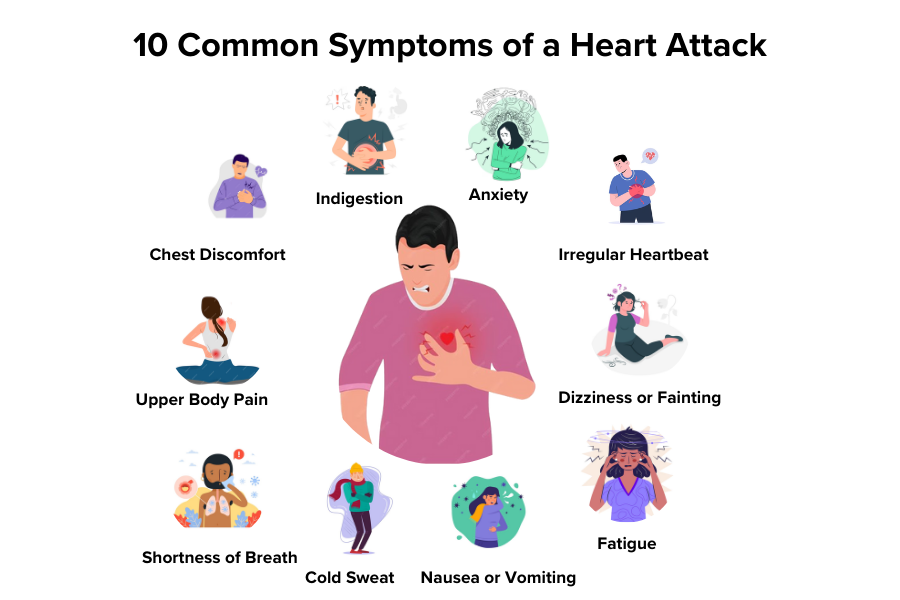




## Analiz İçeriği

1. [Python Kütüphaneleri](#1)
2. [Veri İçeriği](#2)
3. [Veri Seti Yükleme ve Hızlı Analiz](#3)
4. [Veri Keşfi](#4)
5. [Kayıp Değer Analizi](#5)
6. [Benzersiz Değer Analizi](#6)
7. [Kategorik Özellik Analizi](#7)
8. [Sayısal Özellik Analizi](#8)
9. [Standardizasyon](#9)
10. [Kutu Grafik Analizi](#10)
11. [Swarm Plot Analizi](#11)
12. [Cat Plot Analizi](#12)
13. [Korelasyon Analizi](#13)
14. [Outlier Detection](#14)
15. [Modelleme](#15)
      <br> A. Lojistik Regresyon
      <br> B. Support Vector Machine (SVM)
      <br> C. Desicion Tree
      <br> D. Random Forest
      <br> E. KNeighborsClassifier (KNN)
16. [Veri Doğrulama Yöntemlerinin Karşılaştırılması](#16)
17. [Sonuca Bağlı Detaylı Proje Tanıtımı](#17)

<a id='1'></a>
## Python Kütüphaneleri

*   Bu bölümde kullanılacak ana kütüphaneleri içe aktarıyoruz.




In [ ]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import os
#Datayı içeri aktarmak için kullandığımız kısımdır.
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler #Veri standardizasyon`u yapmak için gerekli kütüphane.
from sklearn.model_selection import train_test_split, GridSearchCV #Veri eğitimi için gerekli kütüphane.
from sklearn.metrics import accuracy_score, roc_curve #Sonuç değerlendirme işlemi için gerekli kütüphane.



from sklearn.metrics import  confusion_matrix,roc_auc_score
# confusion_matrix Sınıflandırma modellerinin doğruluğunu ölçmek için kullanılan karışıklık matrisi fonksiyonu.
# roc_auc_score: Modelin doğruluğunu değerlendirmek için kullanılan ROC eğrisi altındaki alan (AUC) skorunu hesaplar.


#cross_val_score: Modelin genel performansını değerlendirmek için çapraz doğrulama yapar.
from sklearn.model_selection import cross_val_score

#SVC (Support Vector Classifier): Destek vektör makineleri ile sınıflandırma yapar, özellikle doğrusal olmayan sınıflandırma için etkilidir
from sklearn.svm import SVC


#classification_report: Modelin sınıflandırma performansını, hassasiyet, geri çağırma, F1 skoru gibi metriklerle özetler.
from sklearn.metrics import classification_report

#RandomForestClassifier: Birden fazla karar ağacı kullanarak sınıflandırma yapar, güçlü ve stabil sonuçlar verir.
from sklearn.ensemble import RandomForestClassifier

#KNeighborsClassifier: K-en yakın komşu algoritmasıyla sınıflandırma yapar, veriye dayalı bir modeldir.
from sklearn.neighbors import KNeighborsClassifier

#DecisionTreeClassifier: Veriye dayalı karar ağacı ile sınıflandırma yapar, modelin yorumlanabilirliğini artırır.
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import roc_curve, auc


# Python`daki hata uyarılarını gizlemek amacıyla kullanırız.
import warnings
warnings.filterwarnings("ignore")

<a id='2'></a>
## Veri İçeriği

* *Age* : Hastanın yaşı
* *Sex* : Hastanın cinsiyeti
* *exang* : egzersize bağlı anjina (1 = evet; 0 = hayır)
* *ca* : ana damar sayısı (0-3)
* *cp* : Göğüs Ağrısı tipi
  * *Value 1* : tipik anjina
  * *Value 2* : atipik anjina
  * *Value 3* : anjinal olmayan ağrı
  * *Value 4* : asemptomatik
* *trtbps* : istirahat kan basıncı (mm Hg cinsinden)
* *chol* : BMI sensörü aracılığıyla alınan mg/dl cinsinden kolestoral
* *fbs* : (açlık kan şekeri > 120 mg/dl) (1 = doğru; 0 = yanlış)
* *rest_ecg* : istirahat elektrokardiyografi sonuçları
  * *Value 0* : normal
  * *Value 1* : ST-T dalga anormalliği olması (T dalga inversiyonları ve/veya > 0,05 mV ST yükselmesi veya çökmesi)
  * *Value 2* : Estes kriterlerine göre olası veya kesin sol ventrikül hipertrofisi gösteren
* *thalach* : ulaşılan maksimum kalp atış hızı
* *target* : 0= daha az kalp krizi olasılığı 1= daha fazla kalp krizi olasılığı

<a id='3'></a>
## Veri Seti Yükleme ve Hızlı Analiz


*   Bu bölümde heart.csv'yi okuyoruz



In [ ]:
#Pandas kütüphanesine ait bu kod bloğu ile data(veri) seti  içindeki ilk 5 satırı head parametresi ile görüntüleme işlemini sağlıyoruz .
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


Veri setimizde, kalp hastalığı sınıflandırmasıyla doğrudan ilişkili 14 sütun bulunmaktadır. Bu sütunlar, rahatsızlığın varlığını veya yokluğunu anlamamıza yardımcı olur. Özellikle, **output sütunu** kalp hastalığının mevcut olup olmadığını belirtir **( output = 1 'hastalık var ' output = 0 'hastalık yok')**.

Bu sütunların çoğunun açıklaması veri içeriği bölümünde detaylı bir şekilde verilmiştir. Ancak **oldpeak** ve **slp** sütunlarına dair açıklamalar şu şekildedir:

**1. slp (Slope of ST Segment - ST Segmentinin Eğimi):**


*   Egzersiz sırasında EKG'de gözlemlenen ST segmentinin eğimini ifade eder.

*   Bu özellik, kalp kasında oksijen eksikliğinin bir göstergesidir.
*   Değerleri genellikle şu şekilde kategorize edilir:
  *  **0:** Eğimsiz veya düz çizgi (kalp rahatsızlığı ihtimalini artırabilir).
  *  **1:** Hafif eğim yukarı (daha sağlıklı bir durum göstergesi).
  *  **2:** Eğilim aşağı (kalp rahatsızlığı belirtisi olabilir).


**2. oldpeak (ST Depression - ST Segmenti Depresyonu):**


*   **oldpeak:** Egzersiz sırasında, dinlenme durumuna kıyasla ST segmentinde meydana gelen depresyon miktarını (mV cinsinden) ifade eder. Bu değer, kalp kasına yeterli kan akışının sağlanamamasını (iskemi) gösterebilir.

    *   0.0-1.0: Hafif veya normal durum, ciddi bir sorun belirtisi yok.
    *   1.0-2.0: Orta düzeyde iskemi veya stres belirtisi olabilir.
    *   2.0 ve üzeri: Yüksek risk, kalp rahatsızlıklarının daha detaylı incelenmesi gerektiğini gösterebilir.

<a id='4'></a>
## Veri Keşifi

In [ ]:
df.output.value_counts()

,count
output,
1,165
0,138


Veri setindeki sınıf dağılımı nispeten dengeli olup, 1 hasta olan 165 kişi, 0 hasta olmayan 138 kişi bunduğunu öğrendim.

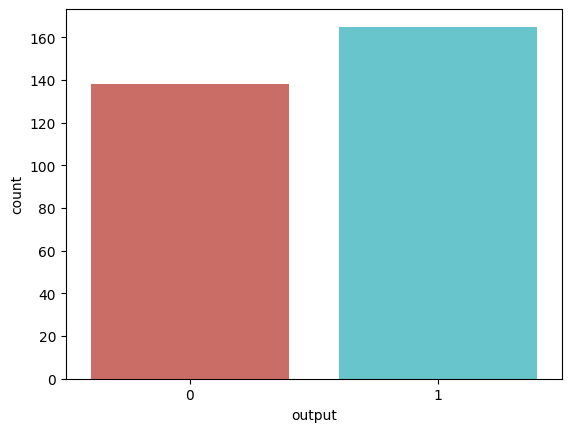

In [ ]:
 sns.countplot(x = "output", data = df,palette = "hls")
plt.show()

Output sütunundan edindiğim bilgiler niteliğinde :

*   Toplamda kalp hastalığına sahip 165 hasta var iken,kalp hastalığı olmayan 138 hasta kaydı bulunmaktadır.**Yeşil sütun** hasta olan insanlara ait bilgileri tutarken, **kırmızı sütun** hasta olmayan insanların kayıtlarının görselidir.



In [ ]:
number_of_disease = len(df[df.output == 1])
number_of_healthy = len(df[df.output == 0])
percentage_of_disease = (number_of_disease / (len(df.output)) * 100)
percentage_of_healthy = (number_of_healthy / (len(df.output)) * 100)
print(f"Kalp Hastaliği olan hastaların oranı : ",percentage_of_disease)
print(f"Sağlıklı olan hastaların oranı : ",percentage_of_healthy)

Kalp Hastaliği olan hastaların oranı :  54.45544554455446
Sağlıklı olan hastaların oranı :  45.54455445544555


Bu küçük hesaplama ile **toplam hasta kayıt bilgisi** üzerinden **sağlıklı** veya **hasta bulunma** yüzdelik değerleri hesaplandı elimdeki örneklem içerisinde bulunan **hastaların %54'ü kalp hastası,%45'inde ise kalp hastalığı bulunmamaktadır**.

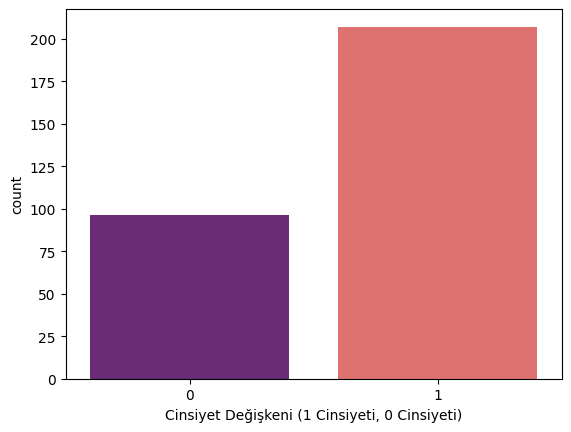

In [ ]:
sns.countplot(x = "sex", data = df, palette = "magma")
plt.xlabel("Cinsiyet Değişkeni (1 Cinsiyeti, 0 Cinsiyeti)")
plt.show()

Bu grafikte ise cinsiyet öznitelğine bağlı olarak hastalık bulunma değerlerini gözlemledim.Bu veri örnekleminden yola çıkarak "1 cinsiyetinin  0 cinsiyetine  oranla kalp rahatsızlığı olma durumu belirgin bir şekilde fazla bulunuyor" diyebiliriz.

In [ ]:
numberofFemale = len(df[df.sex == 0])
numberofMale = len(df[df.sex == 1])
percentage_of_females = (numberofFemale / (len(df.sex) * 100))
percentage_of_males = (numberofMale / (len(df.sex) * 100))
print(f"0 Cinsiyeti: ",percentage_of_females)
print(f"1 Cinsiyeti: ",percentage_of_males)

0 Cinsiyeti:  0.0031683168316831685
1 Cinsiyeti:  0.006831683168316832


Toplamda 303 satır içerisinden yüzde 31'lik dilimde 0 Cinsiyet hasta, 68% oranında da 1 Cinsiyet hasta olduğunu söylüyor

In [ ]:
df.groupby("output").mean()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall
output,,,,,,,,,,,,,
0,56.601449,0.826087,0.478261,134.398551,251.086957,0.159420,0.449275,139.101449,0.550725,1.585507,1.166667,1.166667,2.543478
1,52.496970,0.563636,1.375758,129.303030,242.230303,0.139394,0.593939,158.466667,0.139394,0.583030,1.593939,0.363636,2.121212


Sonuç sütununa göre hasta olup olmadılarının ortalama değerleri her bir sütun için ayrı ayrı gruplanıyor

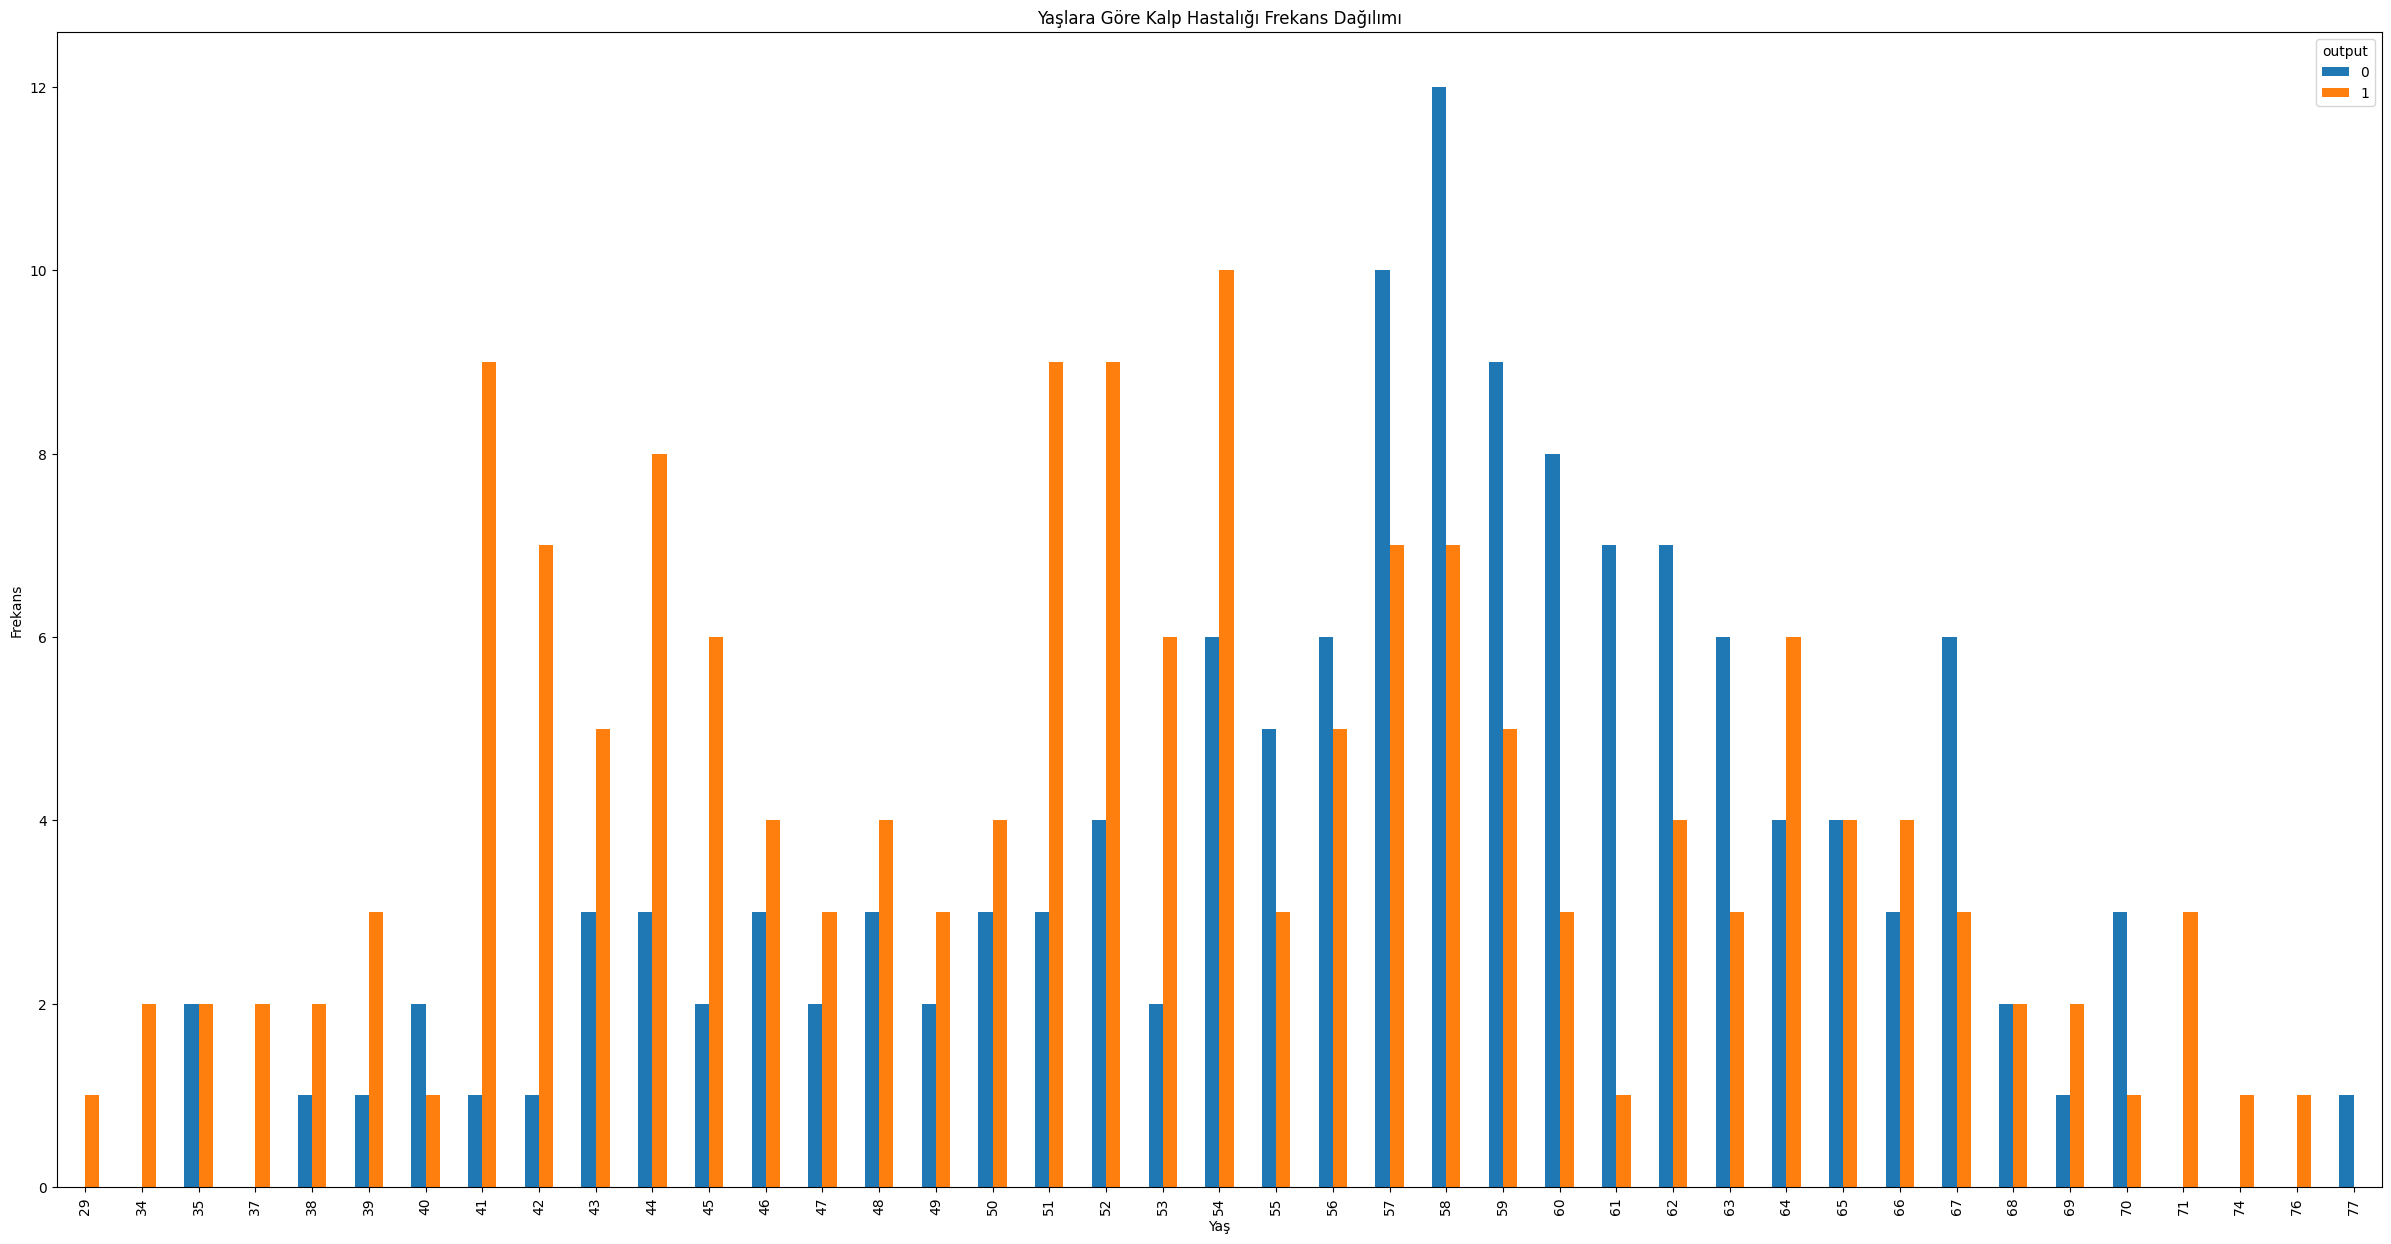

In [ ]:
pd.crosstab(df.age,df.output).plot(kind="bar",figsize = (30,15))
plt.title("Yaşlara Göre Kalp Hastalığı Frekans Dağılımı")
plt.xlabel("Yaş")
plt.ylabel("Frekans")
plt.savefig("kalprahatsizligi.png")
plt.show()

* Grafik, yaşlara göre kalp rahatsızlığı olan (output=1) ve olmayan (output=0) bireylerin frekans dağılımını gösteriyor. Turuncu çubuklar kalp rahatsızlığı olanları (output=1), mavi çubuklar ise olmayanları (output=0) temsil ediyor.

 **Gözlemlerim:**
1. **40-50 yaş aralığında**, kalp rahatsızlığı olanların sayısı belirgin şekilde daha yüksek.
2. **55-65 yaş aralığında**, kalp rahatsızlığı olmayan bireylerin sayısı artış gösteriyor.
3. Kalp rahatsızlığı genellikle **40-55 yaşları arasında daha sık** görülmekte.
4. 60 yaşından itibaren iki grup arasında daha dengeli bir dağılım gözlemleniyor.

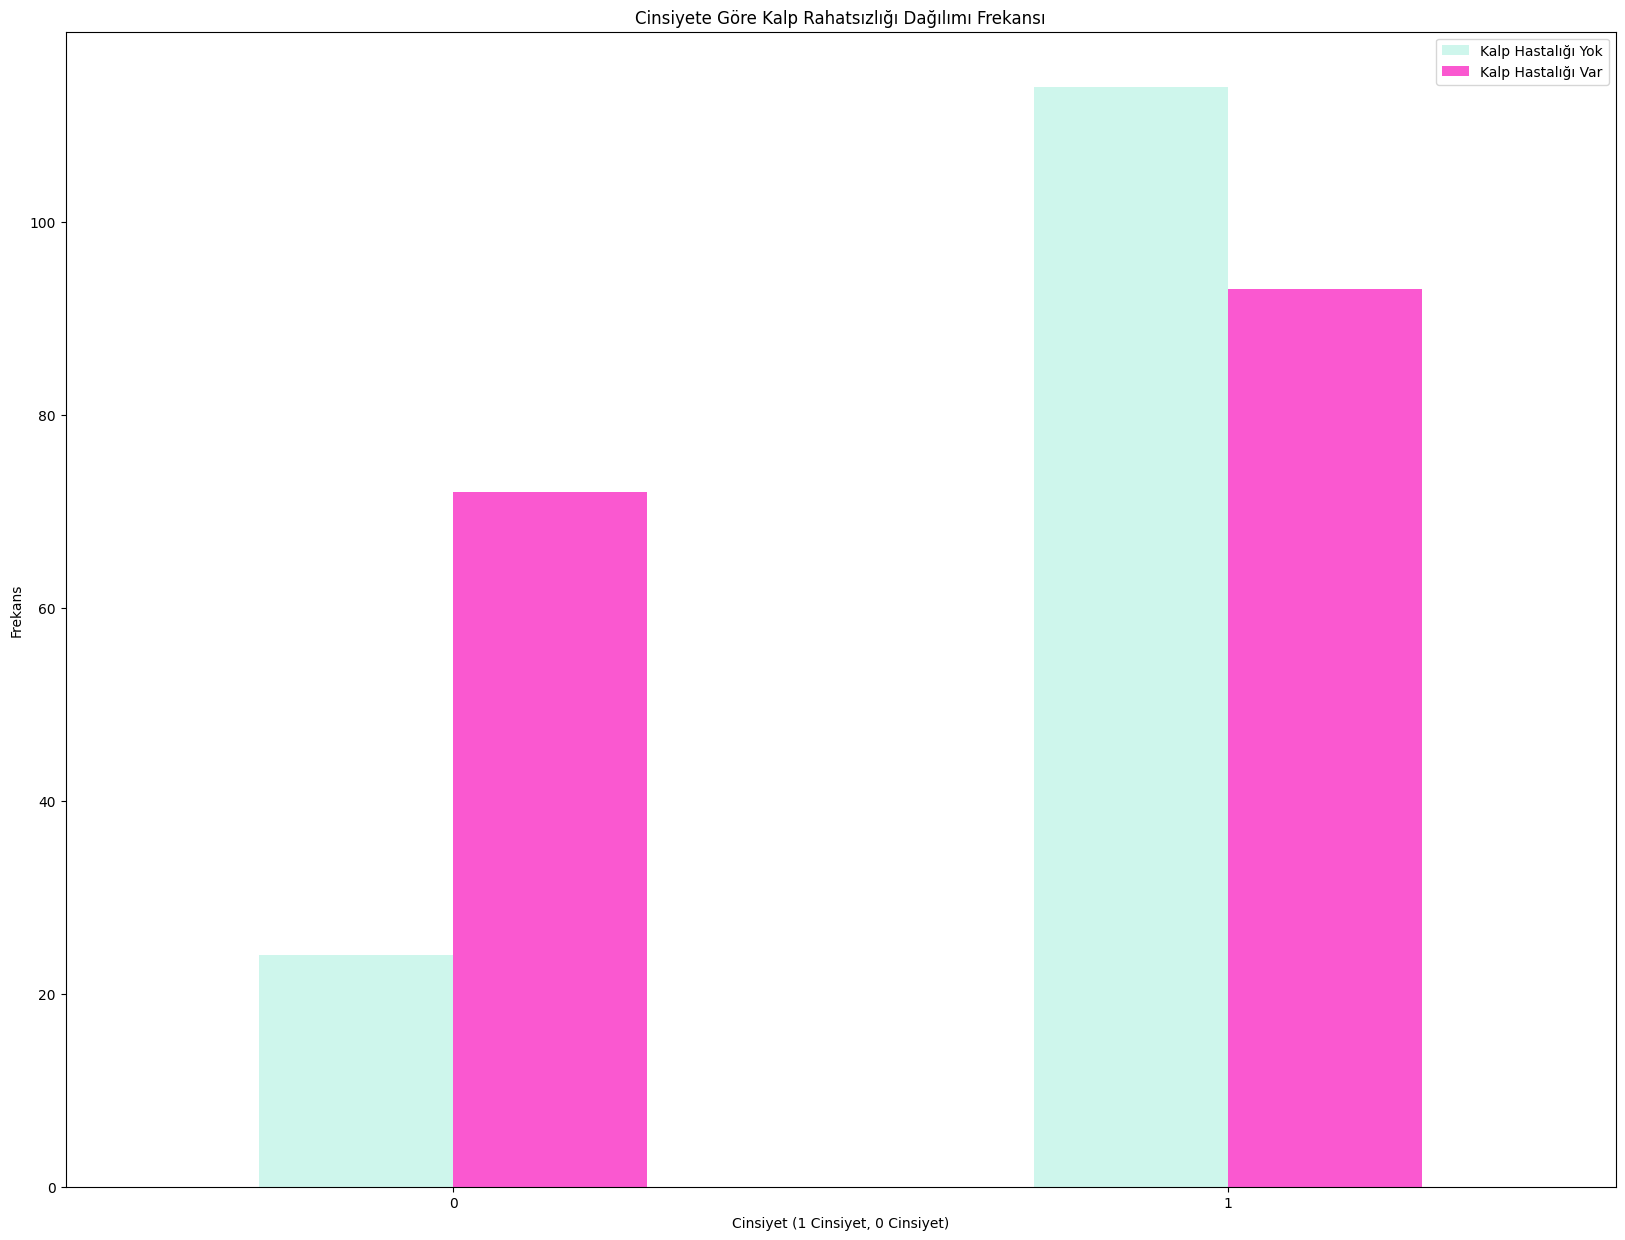

In [ ]:
 pd.crosstab(df.sex,df.output).plot(kind = "bar",figsize=(20,15),color=["#CEF6EC","#FA58D0"])
plt.title("Cinsiyete Göre Kalp Rahatsızlığı Dağılımı Frekansı")
plt.xlabel("Cinsiyet (1 Cinsiyet, 0 Cinsiyet)")
plt.xticks(rotation = 0)
plt.legend(["Kalp Hastalığı Yok","Kalp Hastalığı Var"])
plt.ylabel("Frekans")
plt.show()

Burada da cinsiyete göre hastalığın var olup olmadığını görselleştirdim. 0 Cinsiyetinde(Xlabeldaki 0 değerine bakıyorum) kalp hastalığı olanlar olmayanlardan oldukça fazla. 1 Cinsiyetinde (xlabelda 1 olan değere bakıyorum) kalp hastalığı olmayanalrın sayısı olanlardan daha yüksek

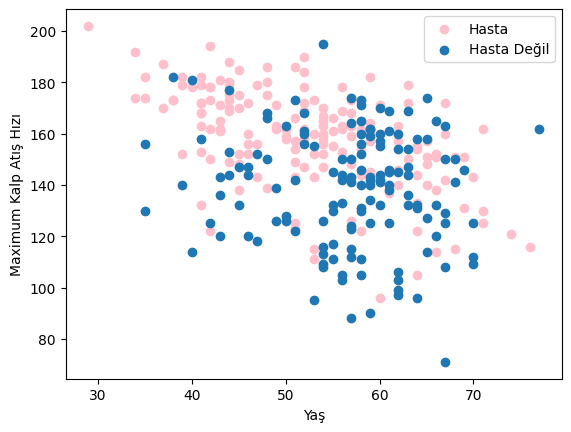

In [ ]:
plt.scatter(x = df.age[df.output == 1], y = df.thalachh[(df.output == 1)], c = "pink")
plt.scatter(x = df.age[df.output == 0], y = df.thalachh[df.output == 0])
plt.legend(["Hasta","Hasta Değil"])
plt.xlabel("Yaş")
plt.ylabel("Maximum Kalp Atış Hızı")
plt.show()

Yaşlara göre kalp atış hızı ile ilşkilendirilmiş 2 boyutlu bir grafite 2 farklı öznitelik ile beraber düşünüldüğünde hasta olma durumunun 30'lu yaşların başından 60'lı yaşlara göre baskın düzeyde oluştuğu görülüyor.Yine de rahatsızlık 70 yaşından uzun hasta kayıtlarında da seyredebiliyor.Hasta olmama durumu ise genellikle 50 ile 70 yaşları arasında daha çok gruplanmış gibi görünüyor

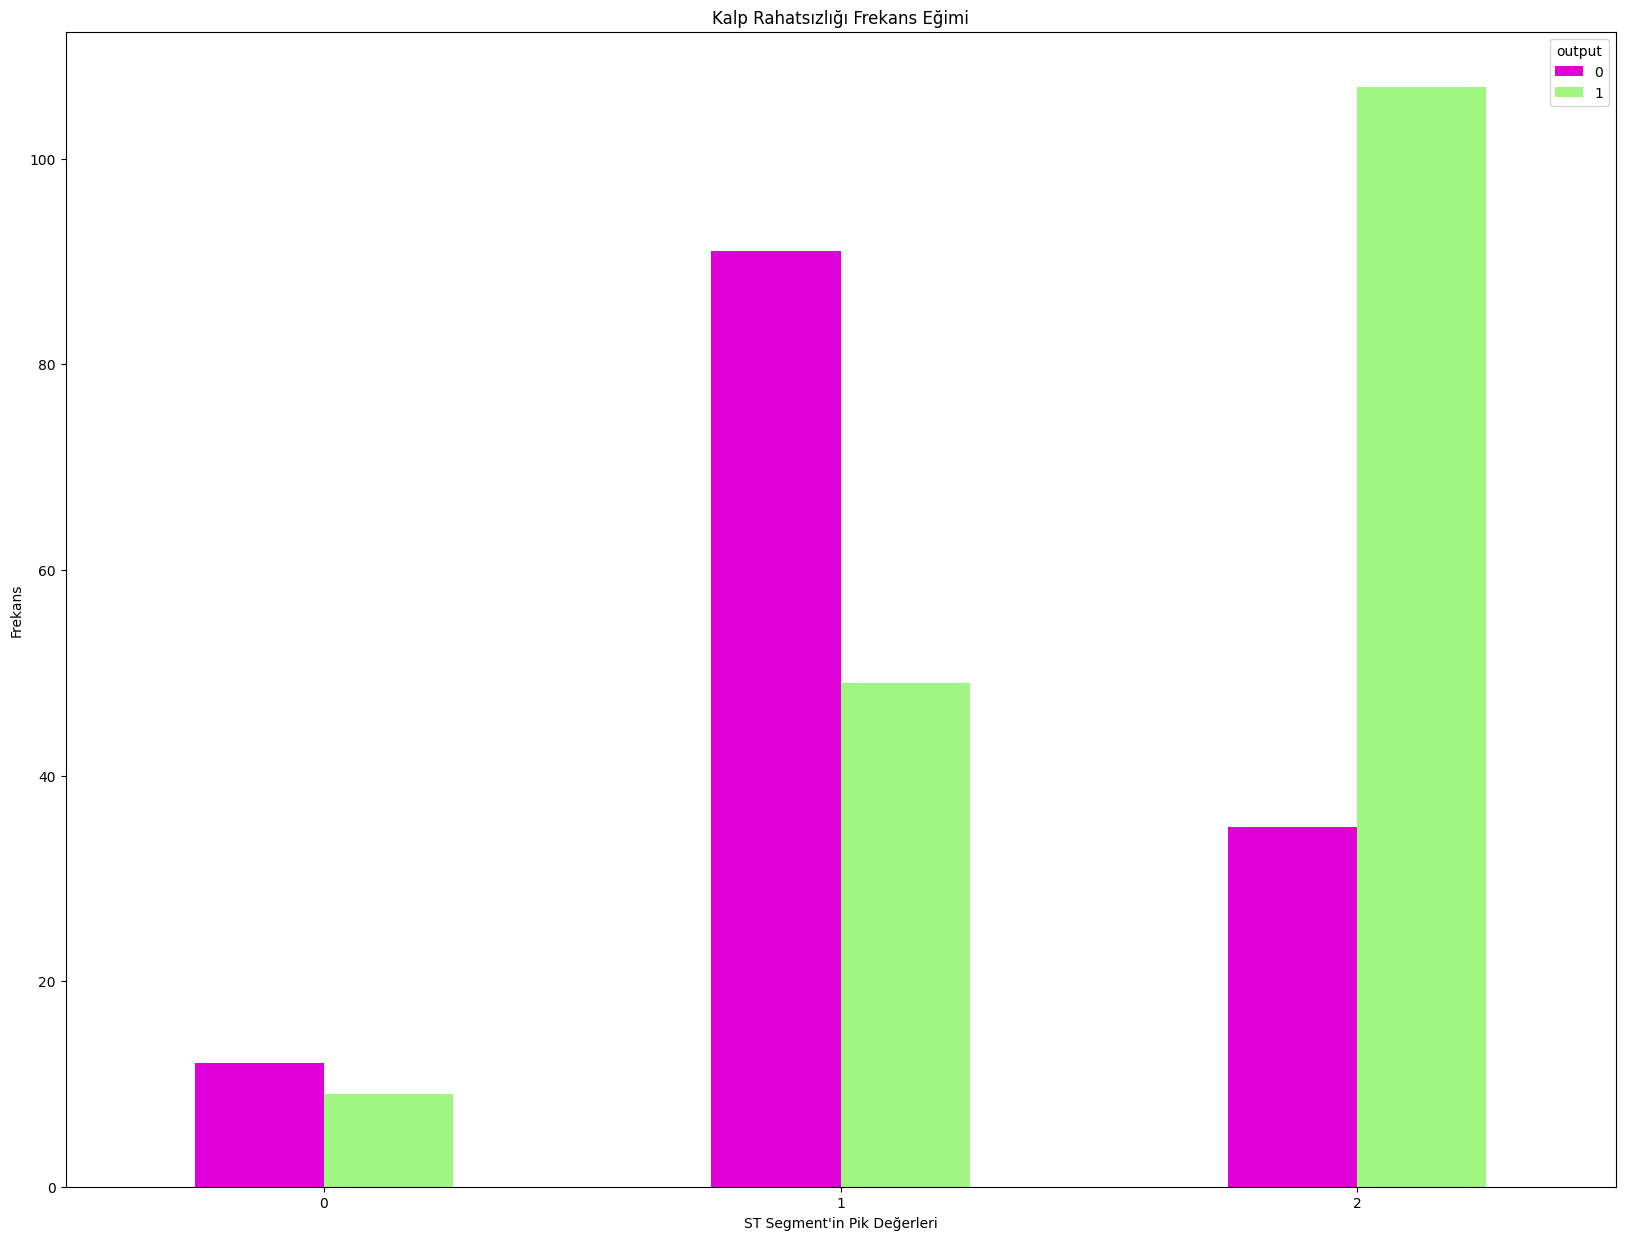

In [ ]:
pd.crosstab(df.slp,df.output).plot(kind="bar",figsize=(20,15),color=['#DF01D7','#9FF781' ])
plt.title("Kalp Rahatsızlığı Frekans Eğimi")
plt.xlabel("ST Segment'in Pik Değerleri")
plt.xticks(rotation = 0)
plt.ylabel("Frekans")
plt.show()

* Bu grafikte, ST segmentinin pik değerleri ile kalp rahatsızlığı arasındaki ilişki gösterilmiştir. Grafikte farklı ST segmenti pik değerlerine göre kalp rahatsızlığı olan (yeşil renkle gösterilen) ve olmayan (mor renkle gösterilen) kişilerin frekansları karşılaştırılmaktadır.

  * **0 Değeri:** Kalp rahatsızlığı olmayan kişilerin sayısı kalp rahatsızlığı olanlara göre biraz daha fazladır.
  * **1 Değeri:** Kalp rahatsızlığı olan kişilerin sayısı olmayanlardan daha fazladır.
  * **2 Değeri:** Kalp rahatsızlığı olan kişilerin sayısı olmayanlara göre oldukça fazladır.

* Genel olarak, ST segmenti pik değeri 2 olan kişilerde kalp rahatsızlığı görülme olasılığı daha yüksektir.

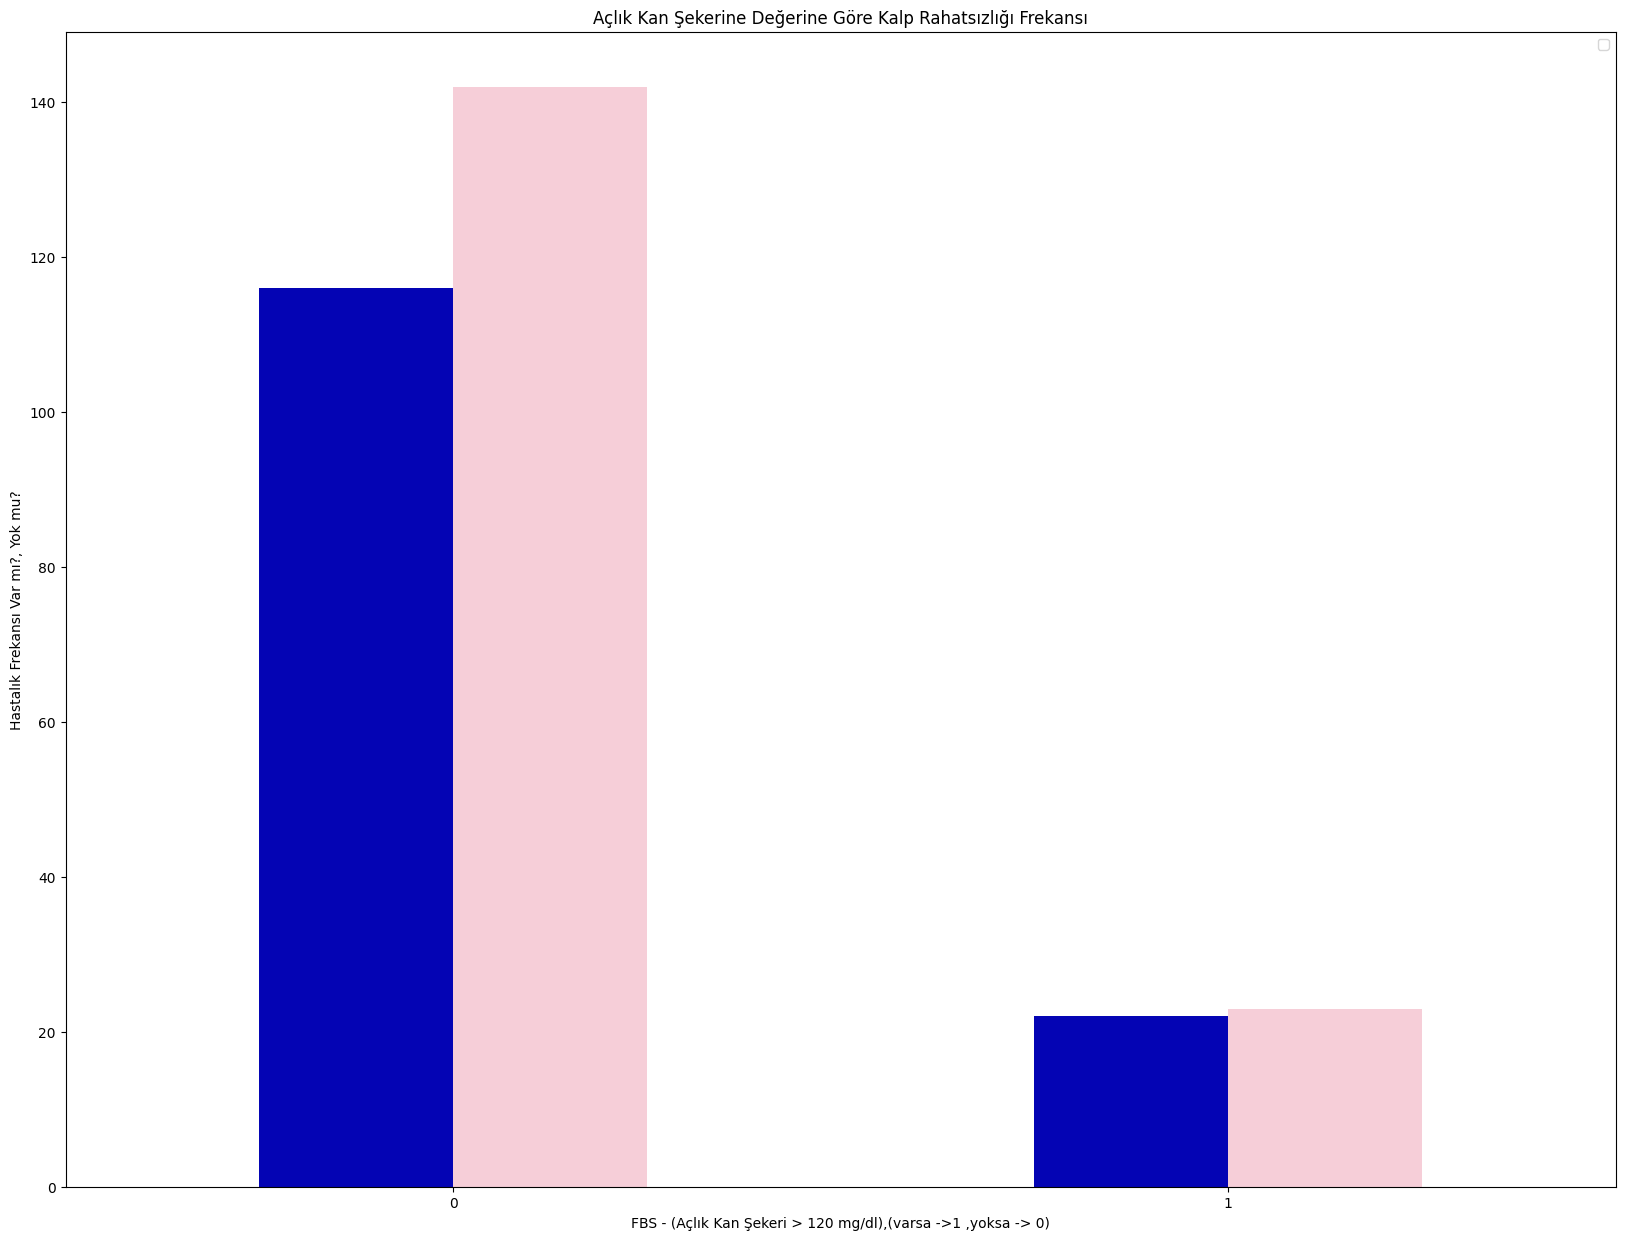

In [ ]:
pd.crosstab(df.fbs,df.output).plot(kind="bar",figsize=(20,15),color=["#0404B4","#F6CED8"])
plt.title("Açlık Kan Şekerine Değerine Göre Kalp Rahatsızlığı Frekansı")
plt.xlabel("FBS - (Açlık Kan Şekeri > 120 mg/dl),(varsa ->1 ,yoksa -> 0)")
plt.xticks(rotation = 0)
plt.legend("Hastalık Yok","Hastalık Var")
plt.ylabel("Hastalık Frekansı Var mı?, Yok mu?")
plt.show()

* Bu grafikte, açlık kan şekeri değerlerine göre kalp rahatsızlığı frekansı inceliyorum .

  * **FBS 0:** Açlık kan şekeri 120 mg/dl'den düşük olan kişileri temsil eder.
  * **FBS 1:** Açlık kan şekeri 120 mg/dl'den yüksek olan kişileri temsil eder.

* Grafikteki iki farklı renk, kalp rahatsızlığı olan ve olmayan kişileri göstermektedir:
  * **Mavi:** Kalp rahatsızlığı olmayan kişiler.
  * **Pembe:** Kalp rahatsızlığı olan kişiler.

* **Yorumum**:
  * Açlık kan şekeri 120 mg/dl'den düşük olan (FBS 0) kişilerin büyük bir kısmı kalp rahatsızlığına sahip değildir. Ancak, bu grupta kalp rahatsızlığı olan kişilerin sayısı da önemli bir miktardadır.
  * Açlık kan şekeri 120 mg/dl'den yüksek olan (FBS 1) kişilerde kalp rahatsızlığı olmayan ve olan kişilerin sayıları birbirine yakındır.

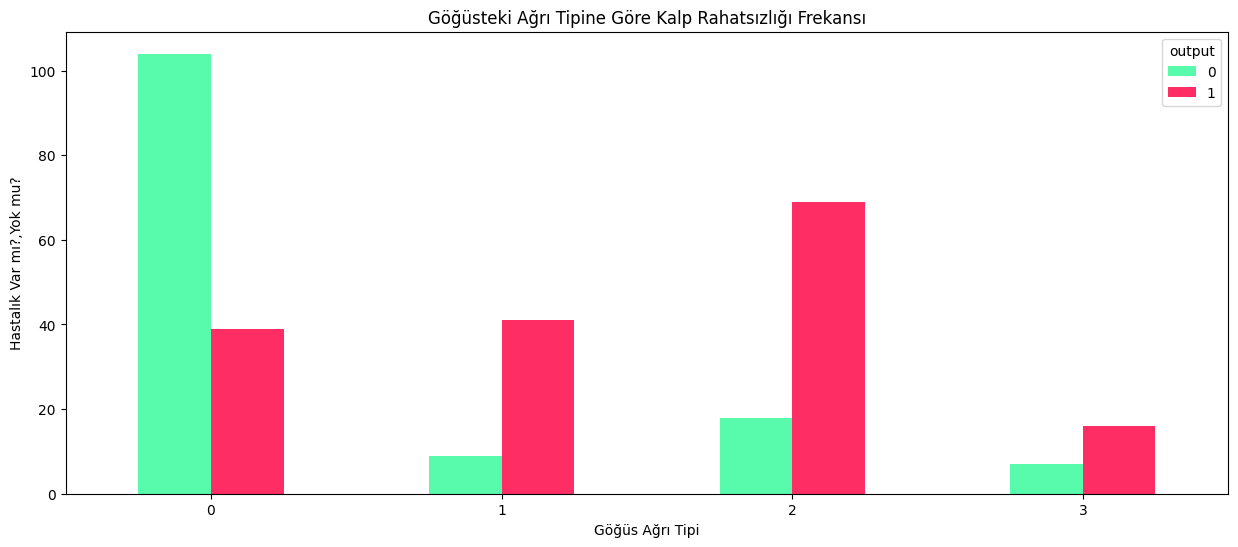

In [ ]:
pd.crosstab(df.cp,df.output).plot(kind="bar",figsize=(15,6),color=['#58FAAC','#FE2E64' ])
plt.title('Göğüsteki Ağrı Tipine Göre Kalp Rahatsızlığı Frekansı')
plt.xlabel('Göğüs Ağrı Tipi')
plt.xticks(rotation = 0)
plt.ylabel('Hastalık Var mı?,Yok mu?')
plt.show()

Son 3 bar grafiğinde aslında yapılmak istenen hastalığın farklı sütunlardaki dağılımını analiz etmekti.ST segment değerine göre,açlık kan şekerine göre ve göğüsteki ağrı tipine göre kalp rahatsızlığı var mı,yok mu ve varsa ne kadar oranda bulunuyor bunu anlamaya çalıştım.

In [ ]:
# Verilerin basit istatiksel değerlerini alma.
df.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


Bu tablo, veri setindeki çeşitli özelliklerin (age, sex, cp, trtbps, chol, fbs, restecg, thalachh, exng, oldpeak, slp, caa, thall, output) temel istatistiksel özetini göstermektedir. Bu özet, her bir özellik için sayım (count), ortalama (mean), standart sapma (std), minimum değer (min), çeyrekler (25%, 50%, 75%), ve maksimum değeri (max) içerir.

Tablodan bazı önemli noktalar:

- **Yaş (age):**
  - Ortalama yaş: 54.37
  - Standart sapma: 9.08
  - En genç birey: 29 yaşında
  - En yaşlı birey: 77 yaşında

- **Cinsiyet (sex):**
  - Ortalama: 0.68 (Bu değer, veri setindeki çoğu bireyin erkek olduğunu gösterir, çünkü erkekler genellikle 1 ile, kadınlar ise 0 ile temsil edilir.)

- **Göğüs Ağrısı Tipi (cp):**
  - Ortalama: 0.97 (Genellikle bu değer 0-3 arasında değişir.)
  - En yaygın göğüs ağrısı tipi: 2

- **Dinlenme Kan Basıncı (trtbps):**
  - Ortalama: 131.62
  - Standart sapma: 17.54
  - Minimum: 94
  - Maksimum: 200

- **Kolesterol (chol):**
  - Ortalama: 246.26
  - Standart sapma: 51.83
  - Minimum: 126
  - Maksimum: 564

- **Açlık Kan Şekeri (fbs):**
  - Ortalama: 0.15 (120 mg/dl'den yüksekse 1, değilse 0)

- **Elektrokardiyografi Sonuçları (restecg):**
  - Ortalama: 0.53 (0, 1, veya 2 olabilir)

- **Maksimum Kalp Hızı (thalachh):**
  - Ortalama: 149.65
  - Standart sapma: 22.91
  - Minimum: 71
  - Maksimum: 202

- **Egzersizle İlişkili Angina (exng):**
  - Ortalama: 0.33 (Bu, bireylerin yaklaşık %33'ünde egzersizle ilişkili angina olduğunu gösterir.)

- **ST Depresyonu (oldpeak):**
  - Ortalama: 1.04
  - Standart sapma: 1.16
  - Minimum: 0
  - Maksimum: 6.2

- **ST Segment Eğimi (slp):**
  - Ortalama: 1.40
  - Standart sapma: 0.62

- **Başlıca Damar Sayısı (caa):**
  - Ortalama: 0.73
  - Standart sapma: 1.02

- **Thalassemia (thall):**
  - Ortalama: 2.31
  - Standart sapma: 0.61

- **Çıktı (output):**
  - Ortalama: 0.54 (Bu, veri setindeki bireylerin yaklaşık %54'ünün kalp rahatsızlığına sahip olduğunu gösterir.)

In [ ]:
# veri çerçevesi (data frame) bilgilerini alma.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


* Burada df veri setinin içerisinde bulunan değişkenlerin tiplerini isimlerini vb. özzelliklerinii öğrenmek için listeliyorum.

<a id='5'></a>
## Kayıp Değer (Veri) Analizi

In [ ]:
# kayıp değer (veri)
df.isnull().sum()

,0
age,0
sex,0
cp,0
trtbps,0
chol,0
fbs,0
restecg,0
thalachh,0
exng,0
oldpeak,0


* Veri setimdeki kayıp değerleri kontrol etmek için **isnull** fonksiyonunu kullandım ve veri setimde herhangi bir eksik değer olup olmadığını inceledim.

* Aldığım sonuçlar doğrultusunda, veri setimde herhangi bir kayıp değer bulunmadığını tespit ettim.

<a id='6'></a>
## Benzersiz Değer (Veri) Analizi

In [ ]:
for i in list(df.columns):
    print("{} -- {}".format(i, df[i].value_counts().shape[0]))

age -- 41
sex -- 2
cp -- 4
trtbps -- 49
chol -- 152
fbs -- 2
restecg -- 3
thalachh -- 91
exng -- 2
oldpeak -- 40
slp -- 3
caa -- 5
thall -- 4
output -- 2


* Veri setindeki her sütundaki benzersiz değer sayısını öğrenmek için **`nunique()`** fonksiyonunu kullandım.

* Bu işlemle, her sütundaki benzersiz değerlerin sayısını belirledim ve veri setimdeki değişkenlerin çeşitliliğini inceledim.

<a id='7'></a>
## Kategorik Özellik Analizi


In [ ]:
categorical_list = ["sex", "cp","fbs","restecg","exng","slp","caa","thall","output"]

* Veri setindeki kategorik değişkenleri, "sex", "cp", "fbs", "restecg", "exng", "slp", "caa", "thall" ve "output" sütunlarını belirledim.

* Aşağıda ; veri setindeki kategorik değişkenlerin her biri için, "output" sütununa göre dağılımları görselleştirmek amacıyla `countplot` fonksiyonunu kullandım. Bu sayede, her bir kategorik değişkenin sınıf dengesini "output" ile karşılaştırarak görsel bir analiz gerçekleştirdim.

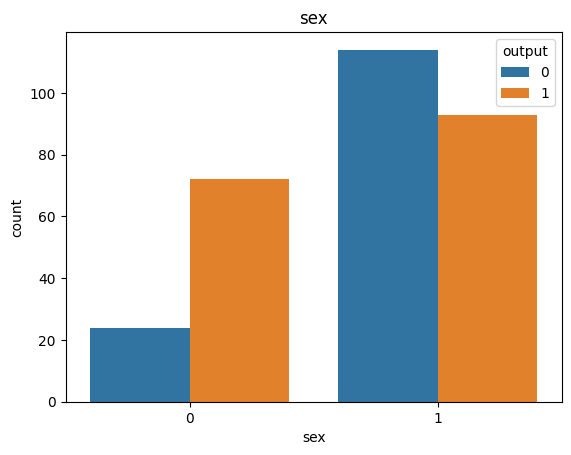

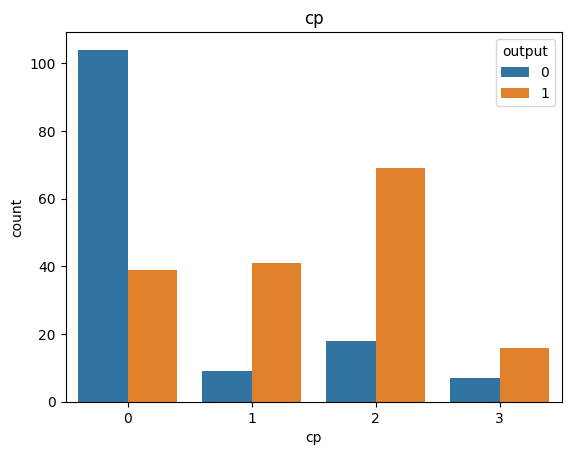

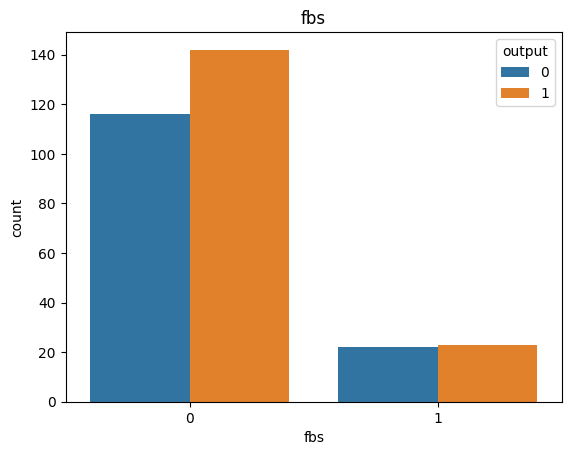

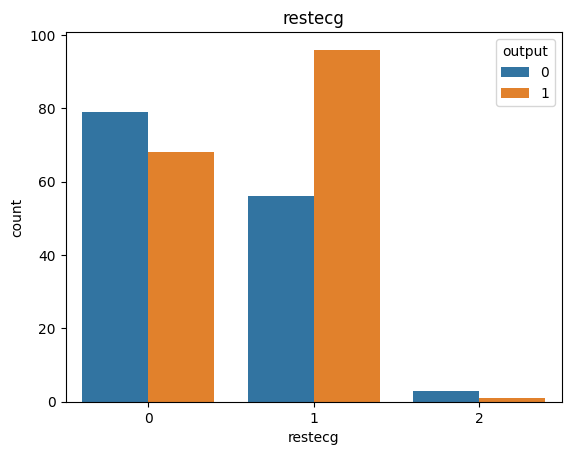

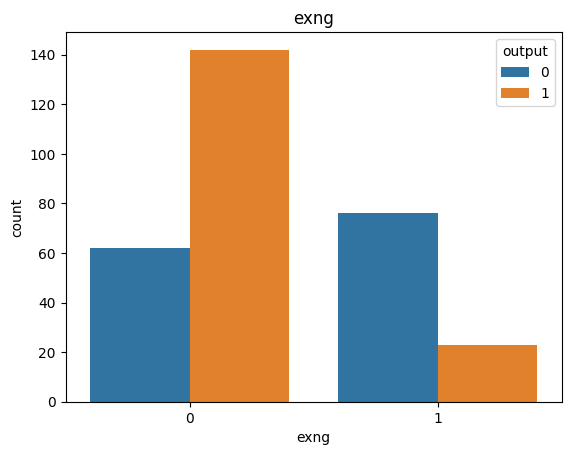

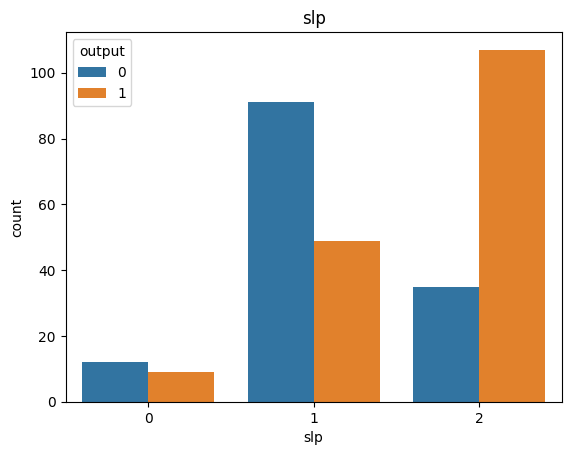

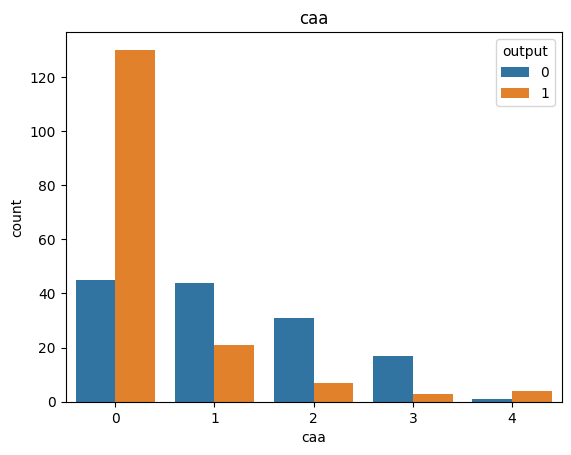

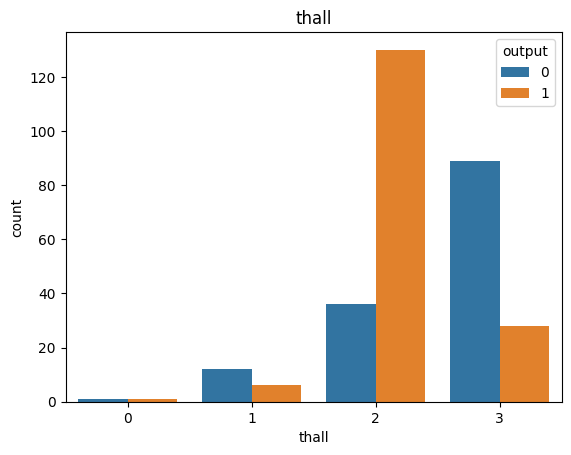

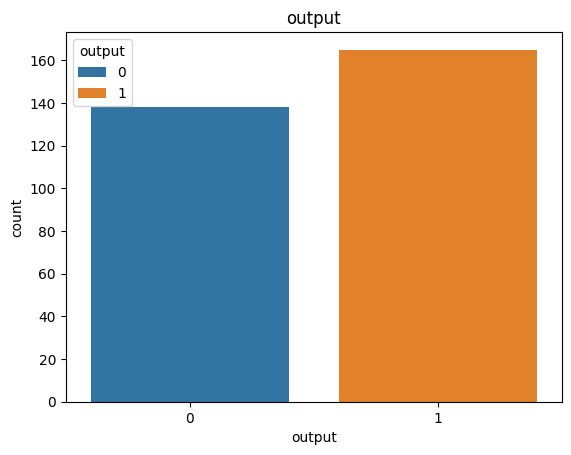

In [ ]:
df_categoric = df.loc[:, categorical_list]
for i in categorical_list:
    plt.figure()
    sns.countplot(x = i, data = df_categoric, hue = "output")
    plt.title(i)

<a id='8'></a>
## Sayısal Özellik Analizi


*   Dağılım grafiği ile iki değişkenli veri analizi.


In [ ]:
numeric_list = ["age", "trtbps","chol","thalachh","oldpeak","output"]

* Bu kodda, yaş, tansiyon, kolesterol, maksimum kalp hızı, ST depresyonu gibi **sayısal değişkenleri** ve **output** (hasta olup olmama durumu) değişkenini içeren bir liste oluşturdum, böylece bu değişkenler üzerinde analiz ve görselleştirme işlemleri yapabileceğim bir veri seti hazırladım.

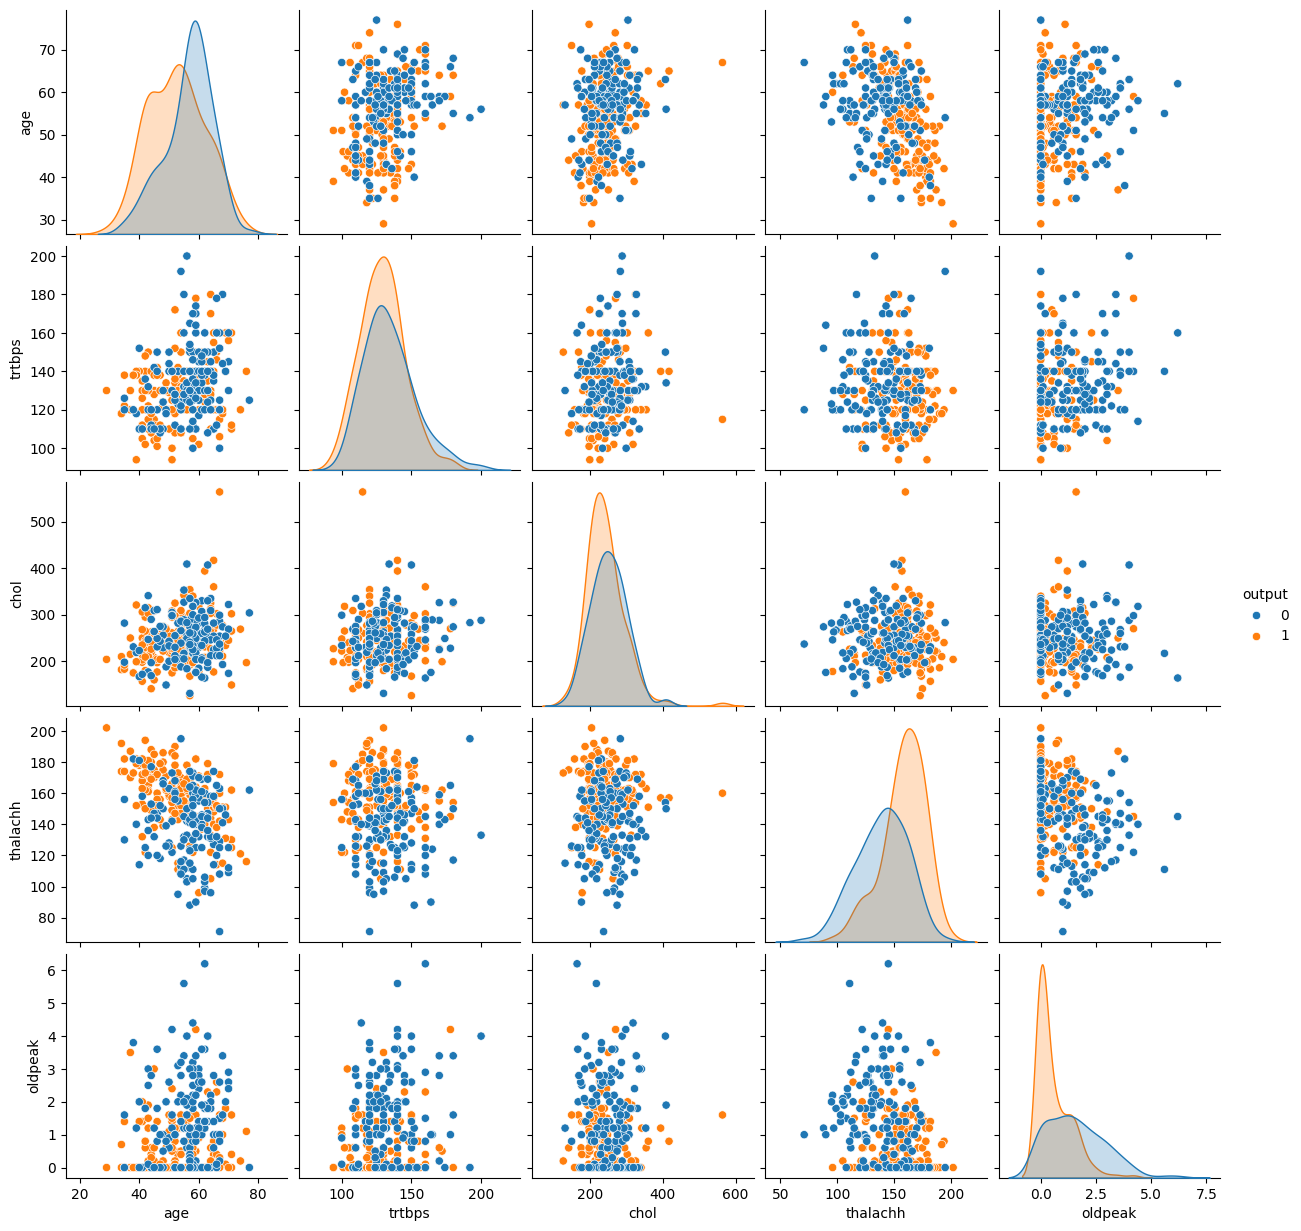

In [ ]:
df_numeric = df.loc[:, numeric_list]
sns.pairplot(df_numeric, hue = "output", diag_kind = "kde")
plt.show()

* Bu kodda, sayısal değişkenler içeren bir veri alt kümesi (`df_numeric`) oluşturduktan sonra, `sns.pairplot()` fonksiyonuyla bu değişkenlerin birbirleriyle olan ilişkilerini görselleştirdim.

* `hue="output"` parametresiyle, her bir ilişkiyi "output" değişkenine göre renklendirerek, hasta olup olmama durumunu görsel olarak ayırt ettim. Ayrıca, çaprazlama gösterimlerin diyagonalinde KDE (Kernel Density Estimation) kullanarak, her bir sayısal değişkenin dağılımını da görselleştirdim.

* Bu sayede veri arasındaki korelasyonları daha rahat görebildim.

<a id='9'></a>
## Standardizasyon

In [ ]:
scaler = StandardScaler()
scaler

StandardScaler()

* Bu kod, veri setini standartlaştırmak için **`StandardScaler`** sınıfını kullanır. **StandardScaler**, her bir özelliği (sütunu) standart bir ölçeğe getirmek için kullanılır

  * **z = (x - μ) / σ**

* Burada:
  * x: Veri değeri
  * μ: Özelliğin ortalaması
  * σ: Özelliğin standart sapması

Bu işlem, modelin daha tutarlı sonuçlar vermesi için veri setini standart bir ölçeğe getirir.

In [ ]:
scaled_array = scaler.fit_transform(df[numeric_list[:-1]])

In [ ]:
scaled_array

array([[ 0.9521966 ,  0.76395577, -0.25633371,  0.01544279,  1.08733806],
       [-1.91531289, -0.09273778,  0.07219949,  1.63347147,  2.12257273],
       [-1.47415758, -0.09273778, -0.81677269,  0.97751389,  0.31091206],
       ...,
       [ 1.50364073,  0.70684287, -1.029353  , -0.37813176,  2.03630317],
       [ 0.29046364, -0.09273778, -2.2275329 , -1.51512489,  0.13837295],
       [ 0.29046364, -0.09273778, -0.19835726,  1.0649749 , -0.89686172]])

* Bu satırda, **`df`** veri setindeki sayısal sütunlardan (numeric sütunlar) sonuncusunu hariç tutarak, daha önce tanımladığımız **`numeric_list`** listesini kullanarak verileri seçiyorum. **`numeric_list[:-1]`** ifadesi, listenin son elemanını dışarıda bırakıp geri kalan elemanları alır.
* Sonrasında, **`scaler.fit_transform()`** fonksiyonu ile bu seçilen sayısal verileri ölçeklendiriyorum (standardizasyon veya normalizasyon işlemi yapılır).

* Elde edilen ölçeklendirilmiş veriler **`scaled_array`** değişkenine atanır. Bu sayede veriler daha homojen bir dağılıma sahip olur ve modelleme sürecinde daha iyi performans elde edilir.

In [ ]:
# pd.DataFrame(scaled_array).describe()

<a id='10'></a>
## Kutu Grafik Analizi

In [ ]:
df_dummy = pd.DataFrame(scaled_array, columns = numeric_list[:-1])
df_dummy.head()

,age,trtbps,chol,thalachh,oldpeak
0,0.952197,0.763956,-0.256334,0.015443,1.087338
1,-1.915313,-0.092738,0.072199,1.633471,2.122573
2,-1.474158,-0.092738,-0.816773,0.977514,0.310912
3,0.180175,-0.663867,-0.198357,1.239897,-0.206705
4,0.290464,-0.663867,2.082050,0.583939,-0.379244


* Bu kodda, **scaled_array** kullanarak ölçeklendirilmiş verilerden bir DataFrame (**df_dummy**) oluşturuyorum ve sütun adlarını **numeric_list**'in son elemanını hariç tutarak belirliyorum; ardından, verinin ilk 5 satırını görüntülüyorum.

In [ ]:
df_dummy = pd.concat([df_dummy, df.loc[:, "output"]], axis = 1)
df_dummy.head()

,age,trtbps,chol,thalachh,oldpeak,output
0,0.952197,0.763956,-0.256334,0.015443,1.087338,1
1,-1.915313,-0.092738,0.072199,1.633471,2.122573,1
2,-1.474158,-0.092738,-0.816773,0.977514,0.310912,1
3,0.180175,-0.663867,-0.198357,1.239897,-0.206705,1
4,0.290464,-0.663867,2.082050,0.583939,-0.379244,1


* Bu kodda, ölçeklendirilmiş verilerin olduğu **df_dummy** DataFrame'ine, orijinal veri setindeki **"output"** sütununu ekliyorum ve birleştirilmiş verinin ilk 5 satırını görüntülüyorum.

In [ ]:
data_melted = pd.melt(df_dummy, id_vars = "output", var_name = "features", value_name = "value")
data_melted.head(20)

,output,features,value
0,1,age,0.952197
1,1,age,-1.915313
2,1,age,-1.474158
3,1,age,0.180175
4,1,age,0.290464
5,1,age,0.290464
6,1,age,0.180175
7,1,age,-1.143291
8,1,age,-0.260980
9,1,age,0.290464


* Bu kodda, **df_dummy** veri setini, analiz ve görselleştirme için daha uygun hale getirmek amacıyla **pd.melt** fonksiyonunu kullanarak "uzun formata" dönüştürdüm.

* Burada, **output** sütununu sabit tutarken diğer tüm özellikleri **features** ve **value** adında iki yeni sütuna böldüm.

* Bu sayede, tüm özelliklerin tek bir sütunda temsil edilmesini sağladım ve veriyi daha esnek bir şekilde işleyebilir hale getirdim. Kodun çıktısında, dönüştürülmüş veri setinin ilk 20 satırını görebiliyoruz.

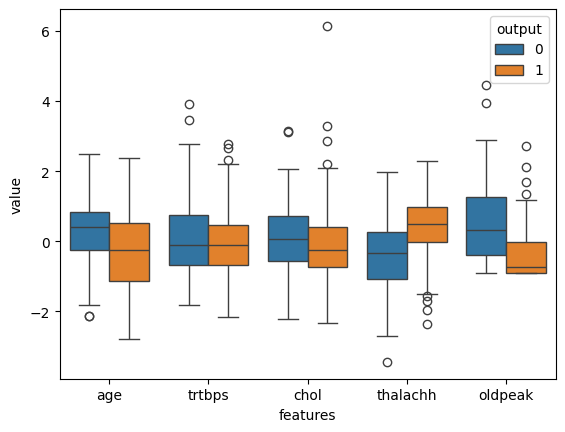

In [ ]:
# box plot
plt.figure()
sns.boxplot(x = "features", y = "value", hue = "output", data= data_melted)
plt.show()

* Bu görsel, bir kutu grafiği (box plot) ve farklı özelliklerin (age, trtbps, chol, thalachh, oldpeak) iki farklı grup için dağılımını gösteriyor. Grafikte mavi renk "output = 0" grubunu, turuncu renk ise "output = 1" grubunu temsil ediyor.

* Özellikler ve sonuçlar arasındaki ilişki şu şekilde gözlemlenebilir:  

1. *Yaş (age):* Her iki grupta da dağılım birbirine oldukça benzer. Ortalamalar ve çeyrekler arasında anlamlı bir fark görünmüyor.  

2. *Kan Basıncı (trtbps):* Gruplar arasında belirgin bir fark yok, her iki grup için de değerler benzer aralıklarda dağılmış.  

3. *Kolesterol (chol):* Kolesterol değerlerinde de iki grup arasında dikkat çekici bir fark gözlenmiyor. Dağılımlar birbiriyle örtüşüyor.  

4. *Maksimum Kalp Atış Hızı (thalachh):* Burada "output = 1" grubu için değerlerin biraz daha yüksek olduğu görülüyor. Bu, kalp rahatsızlığı olanların (1) genelde daha yüksek maksimum kalp atış hızına sahip olabileceğini gösterebilir.  

5. *Oldpeak:* Bu özellikte, "output = 1" grubunun değerlerinin daha düşük olduğu gözlemleniyor. Oldpeak (ST depresyonu), genellikle kardiyovasküler riskle ilişkilidir ve bu grupta düşük olması anlamlı olabilir.  

* Genel olarak, grafik her bir özelliğin iki farklı gruptaki dağılımını karşılaştırmamıza olanak tanıyor ve *thalachh* ve *oldpeak* özelliklerinin gruplar arasında farklılık gösterdiğini öne çıkarıyor. Bu farklılıklar, bu özelliklerin "output" sonucunu tahmin etmek için daha belirleyici olabileceğini düşündürüyor.

<a id='11'></a>
## Swarm Plot Analizi

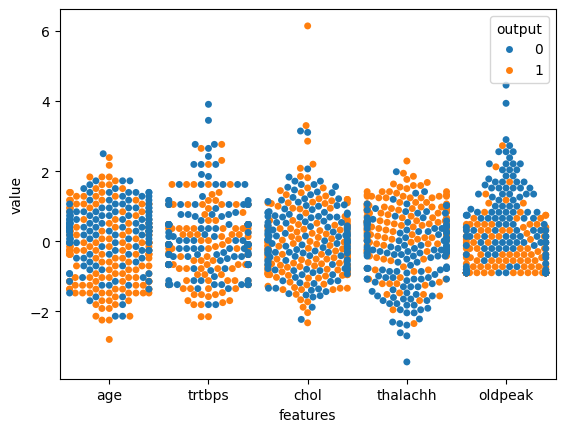

In [ ]:
# swarm plot
plt.figure()
sns.swarmplot(x = "features", y = "value", hue = "output", data= data_melted)
plt.show()

* Bu görsel bir *swarm plot* ve yaş (age), kan basıncı (trtbps), kolesterol (chol), maksimum kalp atış hızı (thalachh) ve oldpeak özelliklerinin iki farklı grup (output = 0 ve output = 1) için nasıl dağıldığını gösteriyor. Mavi noktalar "output = 0" yani kalp rahatsızlığı olmayanları, turuncu noktalar ise "output = 1" yani kalp rahatsızlığı olanları temsil ediyor.

Grafiği şöyle özetleyebilirim:  
1. **Yaş (age):** İki grup arasında belirgin bir fark yok. Rahatsızlığı olan ve olmayanlar yaş bazında oldukça karışık dağılıyor.  
2. **Kan Basıncı (trtbps):** Kan basıncı değerlerinde de gruplar arasında fark pek yok, iki grup oldukça benzer dağılıyor.  
3. **Kolesterol (chol):** Kolesterol değerleri açısından da belirgin bir ayrışma yok, noktalar birbirine çok yakın.  
4. **Maksimum Kalp Atış Hızı (thalachh):** Burada biraz fark var gibi; "output = 1" yani rahatsızlığı olanlar genel olarak daha yüksek kalp atış hızına sahip.  
5. **Oldpeak:** Bu özellikte belirgin bir ayrım var gibi görünüyor. "Output = 1" yani rahatsızlığı olanlar daha düşük oldpeak değerlerinde yoğunlaşmış.

* Genel olarak, bu grafik grupların hangi özelliklerde ayrışıp ayrışmadığını anlamamıza yardımcı oluyor. Özellikle *thalachh* ve *oldpeak* biraz daha ayırt edici görünüyor.

<a id='12'></a>
## Cat Plot Analizi

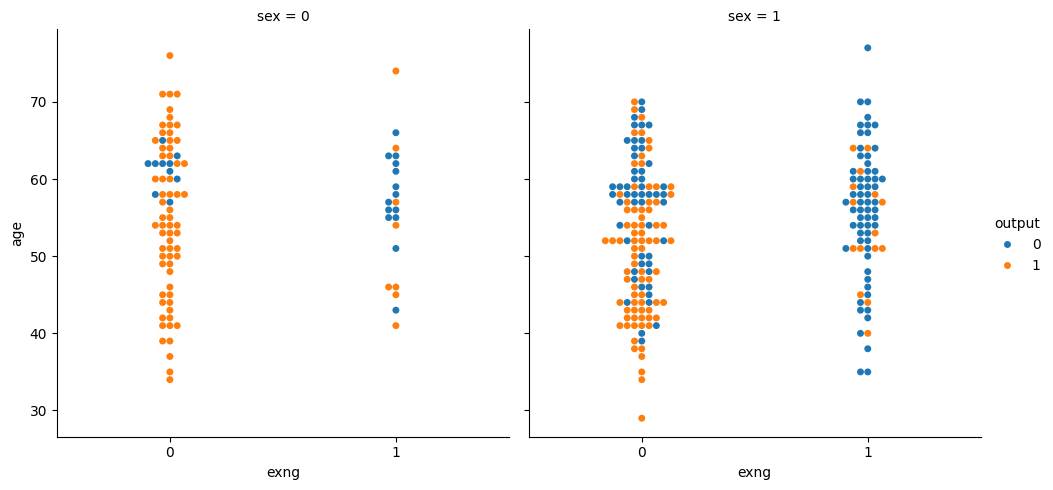

In [ ]:
sns.catplot(x = "exng", y = "age", hue = "output", col = "sex", kind = "swarm", data = df)
plt.show()

* Bu grafikte, yaş, cinsiyet ve egzersiz sırasında anjina (göğüs ağrısı) olup olmamasına göre kalp rahatsızlığı (output) olan ve olmayan grupları kıyaslıyoruz.  

  * **Kadınlar (sex = 0):** Egzersiz sırasında anjina yaşamayan kadınlarda (exng = 0), kalp rahatsızlığı olanların (output = 1, turuncu) daha fazla olduğu açıkça görülüyor. Anjina yaşayan kadınlarda (exng = 1) ise veri daha az ama iki grup da temsil ediliyor.  

  * **Erkekler (sex = 1):** Egzersiz sırasında anjina yaşamayan erkeklerde (exng = 0), kalp rahatsızlığı olanlar ve olmayanlar birbirine karışmış durumda. Ama yaş aralığı geniş olanlarda rahatsızlık ihtimali artıyor gibi. Egzersiz sırasında anjina yaşayan erkeklerde (exng = 1), genelde rahatsızlığı olmayanlar (output = 0, mavi) daha fazla görünüyor.  

* Genel olarak kadınlar için egzersiz sırasında anjina olmasa bile kalp rahatsızlığı daha sık görünüyor. Erkeklerde ise anjina varsa kalp rahatsızlığı daha az rastlanıyor gibi.

<a id='13'></a>
## Korelasyon Analizi

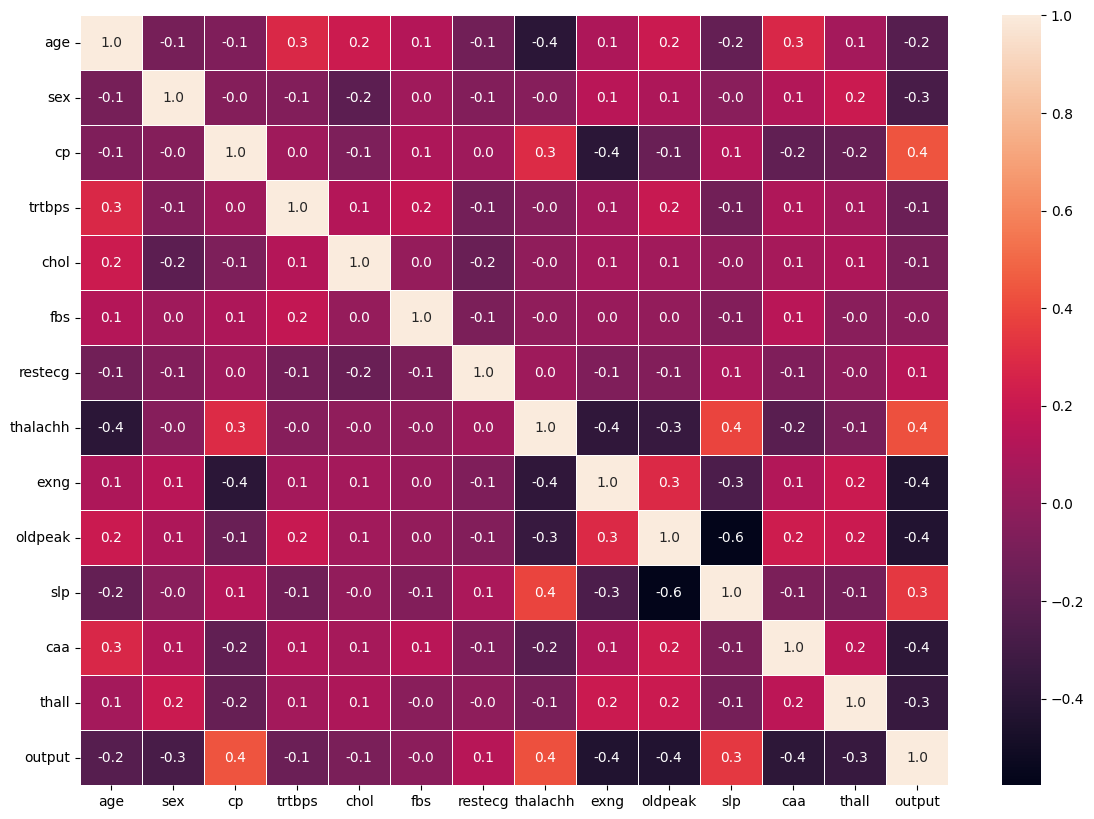

In [ ]:
plt.figure(figsize = (14,10))
sns.heatmap(df.corr(), annot = True, fmt = ".1f", linewidths = .7)
plt.show()

<a id='14'></a>
## Outlier Detection

*   Aykırı değerler makine öğrenimini sürecini kesintiye uğratabilir.
  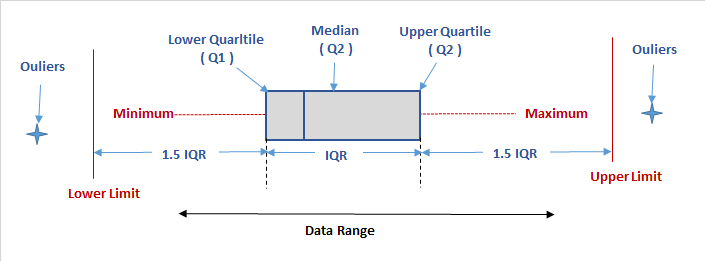







In [ ]:
numeric_list = ["age", "trtbps","chol","thalachh","oldpeak"]
df_numeric = df.loc[:, numeric_list]
df_numeric.head()

,age,trtbps,chol,thalachh,oldpeak
0,63,145,233,150,2.3
1,37,130,250,187,3.5
2,41,130,204,172,1.4
3,56,120,236,178,0.8
4,57,120,354,163,0.6


* Bu kodda, analiz etmek istediğim sayısal özellikleri **`numeric_list`** adlı bir liste içinde tanımladım. Ardından, **`df`** veri setindeki sadece bu özellikleri seçerek **`df_numeric`** adlı yeni bir veri çerçevesi oluşturdum. * Bu sayede, sadece ilgilendiğim sayısal sütunlarla çalışmayı kolaylaştırmış oldum.
* Kodun çıktısında, seçilen sütunlardan oluşan **`df_numeric`** veri setinin ilk 5 satırını görebiliyoruz.

In [ ]:
df.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [ ]:
# outlier detection
for i in numeric_list:

    # IQR
    Q1 = np.percentile(df.loc[:, i],25)
    Q3 = np.percentile(df.loc[:, i],75)

    IQR = Q3 - Q1

    print("Old shape: ", df.loc[:, i].shape)

    # upper bound
    upper = np.where(df.loc[:, i] >= (Q3 +2.5*IQR))

    # lower bound
    lower = np.where(df.loc[:, i] <= (Q1 - 2.5*IQR))

    print("{} -- {}".format(upper, lower))

    try:
        df.drop(upper[0], inplace = True)
    except: print("KeyError: {} not found in axis".format(upper[0]))

    try:
        df.drop(lower[0], inplace = True)
    except:  print("KeyError: {} not found in axis".format(lower[0]))

    print("New shape: ", df.shape)

Old shape:  (303,)
(array([], dtype=int64),) -- (array([], dtype=int64),)
New shape:  (303, 14)
Old shape:  (303,)
(array([223, 248]),) -- (array([], dtype=int64),)
New shape:  (301, 14)
Old shape:  (301,)
(array([85]),) -- (array([], dtype=int64),)
New shape:  (300, 14)
Old shape:  (300,)
(array([], dtype=int64),) -- (array([], dtype=int64),)
New shape:  (300, 14)
Old shape:  (300,)
(array([203, 220]),) -- (array([], dtype=int64),)
New shape:  (298, 14)


* Bu kod ile, numeric_list içindeki sayısal sütunlarda çıkıntı aykırı değerleri (outlier) tespit edip, veri setinden çıkarıyorum.

<a id='15'></a>
## Modelleme

In [ ]:
# Veri setini kopyalama
df_encoded = df.copy()

### Kategorik Sütunların Kodlanması
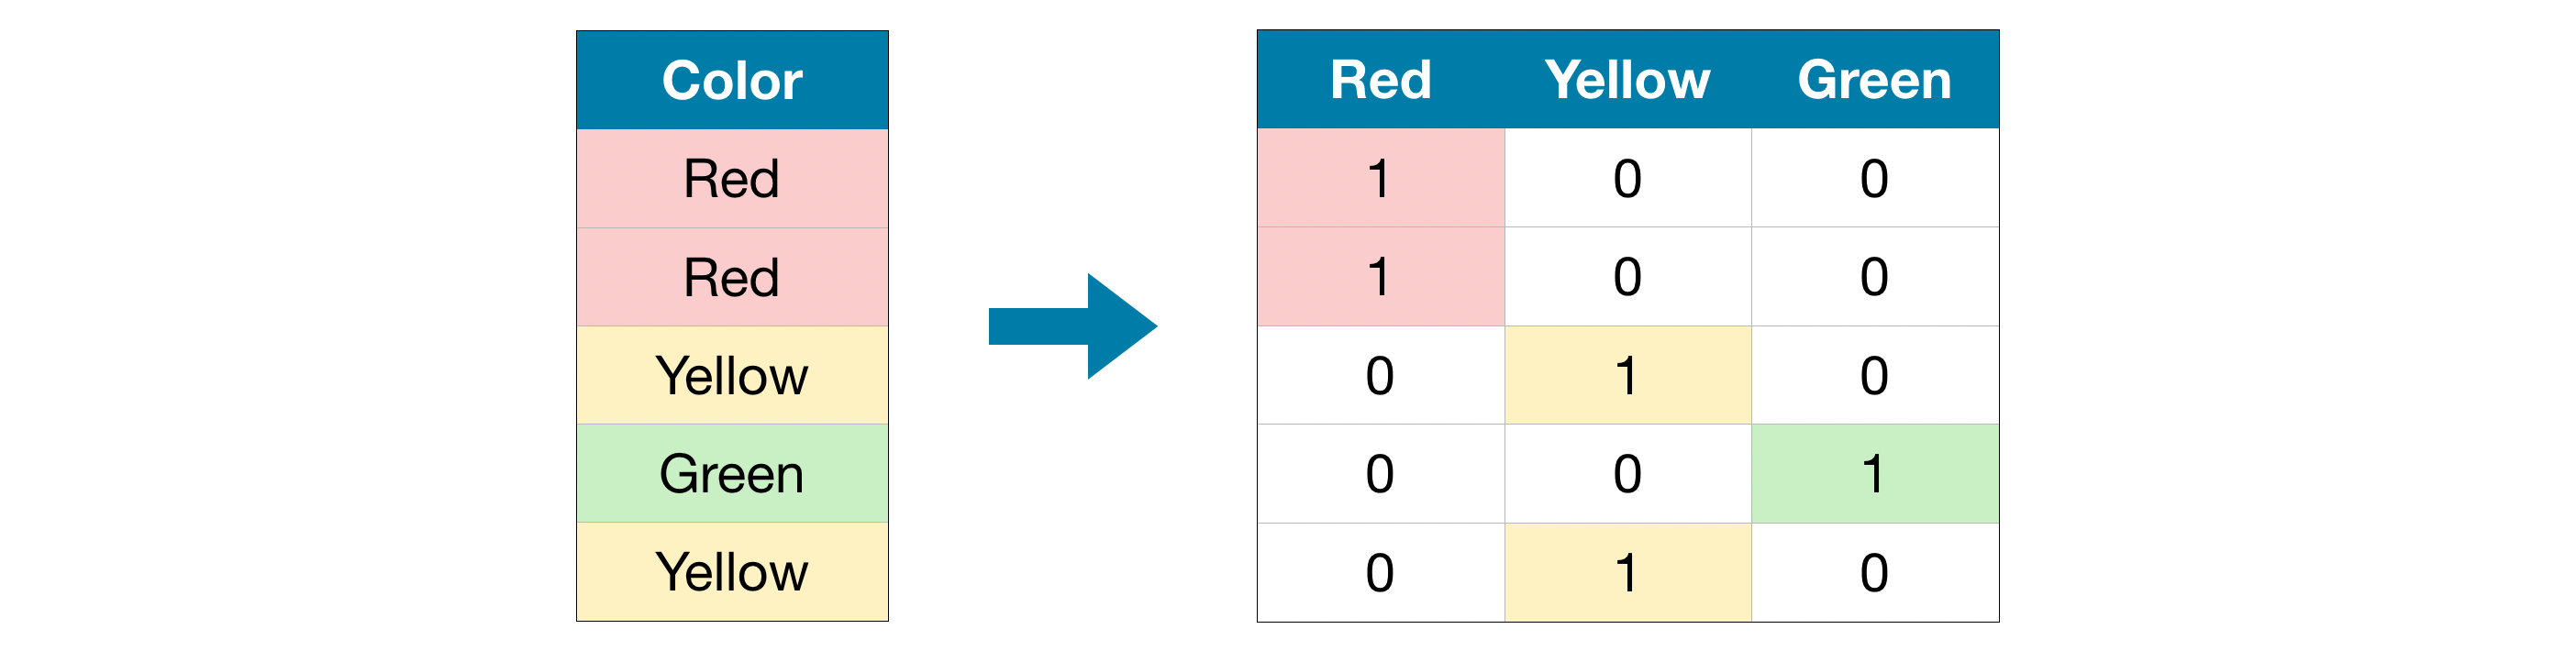

In [ ]:
# Kategorik sütunlar
categorical_list = ["sex", "cp", "fbs", "restecg", "exng", "slp", "caa", "thall"]

* Burada, veri setindeki **`categorical_list`** değişkenini oluşturarak, modelleme sürecinde **"cinsiyet" (sex), göğüs tipi (cp), açlık kan şekeri (fbs), dinlenme elektrokardiyografisi (restecg), egzersiz anjinası (exng), eğim (slp), damarsal sayılar (caa) ve talasemi (thall)** gibi kategorik sütunları tanımlıyorum.

* Bu sütunlar ilerleyen aşamalarda **one-hot encoding** gibi işlemlerle sayısal forma dönüştürülerek modelleme için uygun hale getirilecektir.

In [ ]:
# Kategorik değişkenleri one-hot encoding ile kodlama
df_encoded = pd.get_dummies(df_encoded, columns=categorical_list, drop_first=True)
df_encoded.head()

,age,trtbps,chol,thalachh,oldpeak,output,sex_1,cp_1,cp_2,cp_3,...,exng_1,slp_1,slp_2,caa_1,caa_2,caa_3,caa_4,thall_1,thall_2,thall_3
0,63,145,233,150,2.3,1,True,False,False,True,...,False,False,False,False,False,False,False,True,False,False
1,37,130,250,187,3.5,1,True,False,True,False,...,False,False,False,False,False,False,False,False,True,False
2,41,130,204,172,1.4,1,False,True,False,False,...,False,False,True,False,False,False,False,False,True,False
3,56,120,236,178,0.8,1,True,True,False,False,...,False,False,True,False,False,False,False,False,True,False
4,57,120,354,163,0.6,1,False,False,False,False,...,True,False,True,False,False,False,False,False,True,False


* Burada, **`df_encoded`** veri setindeki kategorik değişkenleri **"one-hot encoding"** yöntemiyle sayısal hale getiriyorum.

* **`pd.get_dummies`** fonksiyonu, her bir kategorik değişkenin benzersiz değerleri için ayrı sütunlar oluşturur ve bu sütunlar 0 veya 1 değerlerini alır. Ayrıca, **`drop_first=True`** parametresi ile referans bir kategori bırakılarak, gereksiz sütunların eklenmesi önlenir ve veri setindeki sütun sayısı azaltılır.

* Bu işlem, modelin kategorik verilerle daha etkili çalışmasını sağlar.

In [ ]:
# Bağımsız ve hedef değişkenlerin ayrılması
x = df_encoded.drop(["output"], axis=1)
y = df_encoded["output"]

* Burada, **veri setindeki bağımsız değişkenler (özellikler)** ile **hedef değişkeni (output)** birbirinden ayırıyorum.

* **`x`** değişkenine bağımsız değişkenleri, **`y`** değişkenine ise hedef değişkeni atayarak, makine öğrenmesi modellerinin eğitimi ve test işlemleri için gerekli olan veri setini hazırlıyorum.

### Ölçeklendirme

In [ ]:
# Sayısal sütunların listesi
numeric_list = ["age", "trtbps", "chol", "thalachh", "oldpeak"]

* Burada, **`numeric_list`** adında bir liste oluşturarak veri setindeki **sayısal sütunları** belirtiyorum.
* Bu liste, yaş, kan basıncı, kolesterol seviyeleri gibi sayısal değer içeren sütunlardan oluşuyor ve veri işleme adımlarında bu sütunlara kolayca erişmek için kullanıyorum.

In [ ]:
# Ölçeklendirme
scaler = StandardScaler()

* Burada, **`StandardScaler`** sınıfını kullanarak sayısal verilerin **ölçeklendirilmesi** için bir **scaler** nesnesi oluşturuyorum.
* Bu işlem, sayısal sütunlardaki değerleri standart normal dağılıma (ortalama=0, standart sapma=1) dönüştürerek model eğitiminde daha iyi sonuçlar almayı hedefliyor.

In [ ]:
x.loc[:, numeric_list] = scaler.fit_transform(x.loc[:, numeric_list])
x.head()

,age,trtbps,chol,thalachh,oldpeak,sex_1,cp_1,cp_2,cp_3,fbs_1,...,exng_1,slp_1,slp_2,caa_1,caa_2,caa_3,caa_4,thall_1,thall_2,thall_3
0,0.965901,0.845093,-0.236684,0.021855,1.122573,True,False,False,True,True,...,False,False,False,False,False,False,False,True,False,False
1,-1.902555,-0.061886,0.119326,1.639116,2.174545,True,False,True,False,False,...,False,False,False,False,False,False,False,False,True,False
2,-1.461254,-0.061886,-0.843995,0.983470,0.333595,False,True,False,False,False,...,False,False,True,False,False,False,False,False,True,False
3,0.193624,-0.666538,-0.173859,1.245729,-0.192391,True,True,False,False,False,...,False,False,True,False,False,False,False,False,True,False
4,0.303950,-0.666538,2.297269,0.590082,-0.367719,False,False,False,False,False,...,True,False,True,False,False,False,False,False,True,False


* Burada, **`x`** değişkenindeki **sayısal sütunları** (`numeric_list` kullanılarak belirlenen) **standartlaştırma işlemi** uyguluyorum.

* **`StandardScaler`** nesnesi ile bu sütunların her birini ölçeklendirip, standart normal dağılıma (ortalama = 0, standart sapma = 1) uygun hale getiriyor ve ardından bu dönüşümü **`x`** veri setine geri atıyorum.

* Bu işlem, model performansını artırmak için veriyi daha homojen hale getiriyor.

### Eğitim/Test Bölünmesi

In [ ]:
# Eğitim ve test setlerine ayırma
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=42)

* Burada veri setini **eğitim ve test setlerine** ayırıyorum. **train_test_split fonksiyonu** ile ayırma işlemi oluşturulur:

  * **x_train:** Eğitim seti için giriş özellikleri.
  * **x_test:** Test seti için giriş özellikleri.
  * **y_train:** Eğitim seti için hedef değişken.
  * **y_test:** Test seti için hedef değişken.


* **test_size=0.1** ile veri setinin **%10'unu** test setine ayırıyorum, kalan **%90'ı** ise eğitim için kullanıyorum.
* **random_state=42** ile bölme işlemini tekrar ettiğimde aynı sonuçları elde etmeyi sağlıyorum.

* Bu adım, modelin performansını henüz görmediği test verileri üzerinde değerlendirebilmemi sağlıyor.

In [ ]:
# Boyutları kontrol etme
print("x_train: {}".format(x_train.shape)) # Changed X_train to x_train
print("x_test: {}".format(x_test.shape))   # Changed X_test to x_test
print("y_train: {}".format(y_train.shape))
print("y_test: {}".format(y_test.shape))

x_train: (268, 22)
x_test: (30, 22)
y_train: (268,)
y_test: (30,)


* Bu çıktılar, veri setinin doğru bir şekilde ayrılıp ayrılmadığını kontrol etmek ve model eğitimine geçmeden önce **setlerin boyutlarını doğrulamak** için kullanılır.

 * **x_train.shape:** Eğitim setindeki giriş özelliklerinin boyutlarını gösterir.
 * **x_test.shape:** Test setindeki giriş özelliklerinin boyutlarını gösterir.
 * **y_train.shape:** Eğitim setindeki hedef değişkenin boyutlarını gösterir.
 * **y_test.shape:** Test setindeki hedef değişkenin boyutlarını gösterir.

### Lojistik Regresyon

In [ ]:
# Logistic Regression Modeli
logreg = LogisticRegression(max_iter=1000, random_state=42)

* Bu satırda, **LogisticRegression** modelini oluşturuyoruz ve bu model için **logreg** değişkenini kullanıyoruz.

* Burada **max_iter=1000 parametresi**, modelin eğitilmesi sırasında yapılacak en fazla **iterasyon** sayısını belirler. Eğer model **konverjansa (daha doğrusu optimal çözüm bulmaya)** ulaşamazsa, bu parametre sayesinde maksimum **1000** iterasyon yapılmasını sağlarız.

* **Iterasyon**, bir algoritmanın belirli bir işlemi veya adımı tekrarlayarak daha iyi sonuçlar elde etmek için yaptığı her bir adımdır.

In [ ]:
# Model eğitimi
logreg.fit(x_train, y_train)

LogisticRegression(max_iter=1000, random_state=42)

* Bu satırda, **logreg.fit(x_train, y_train)** kodu, **Lojistik Regresyon** modelini eğitim verisi (x_train) ve hedef değişkeni (y_train) ile eğitir.

* **fit** fonksiyonu, verilen eğitim verisiyle modelin **parametrelerini** ayarlar ve modelin **öğrenmesini** sağlar.

In [ ]:
# Tahmin yapma
y_pred_logreg = logreg.predict(x_test)

* Bu satırda, **y_pred_logreg = logreg.predict(x_test)** kodu, eğitilmiş **Lojistik Regresyon** modelini kullanarak test verisi **(x_test)** üzerinde **tahminler** yapar.
* Model, test setindeki verileri kullanarak **sınıflandırma yapar** ve **tahmin edilen** sınıfları **y_pred_logreg** değişkenine kaydeder.

In [ ]:
# Model değerlendirme
print("Lojistik Regresyon Doğruluk Skoru: ", accuracy_score(y_test, y_pred_logreg))
print("Sınıflandırma Raporu: \n", classification_report(y_test, y_pred_logreg))

Lojistik Regresyon Doğruluk Skoru:  0.8666666666666667
Sınıflandırma Raporu: 
               precision    recall  f1-score   support

           0       0.82      0.82      0.82        11
           1       0.89      0.89      0.89        19

    accuracy                           0.87        30
   macro avg       0.86      0.86      0.86        30
weighted avg       0.87      0.87      0.87        30



**Doğruluk Skoru (accuracy_score)**, modelin doğru tahmin ettiği örneklerin toplam örneklere oranını ölçer. `accuracy_score(y_test, y_pred_logreg)` fonksiyonu, test setindeki gerçek ve tahmin edilen değerleri karşılaştırarak bu oranı hesaplar.

**Sınıflandırma Raporu (classification_report)**, modelin precision (kesinlik), recall (geri çağırma), f1-score gibi metriklerini ve her sınıf için performansını raporlar. `classification_report(y_test, y_pred_logreg)` fonksiyonu, bu metriklerin yanı sıra doğruluk ve ağırlıklı ortalama değerlerini de gösterir.

####*ROC Curve *

In [ ]:
y_pred_prob = logreg.predict_proba(x_test)[:, 1]

* `predict_proba(x_test)` fonksiyonu ile lojistik regresyon modelinin test verisi üzerinde tahmin edilen olasılıklarını hesaplıyorum. `[:, 1]` ifadesiyle yalnızca pozitif sınıfa ait olasılıkları alıyorum.

In [ ]:
# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

* Bu kodla , **`roc_curve`** fonksiyonu ile **gerçek etiketler** **(`y_test`)** ve **tahmin edilen olasılıklar** **(`y_pred_prob`)** kullanarak ROC eğrisinin **doğruluk ve hata oranlarını** hesaplar. **`auc`** fonksiyonu ise bu eğrinin altındaki alanı **(Area Under Curve - AUC)** hesaplar, bu da modelin **genel başarısını** ölçer.

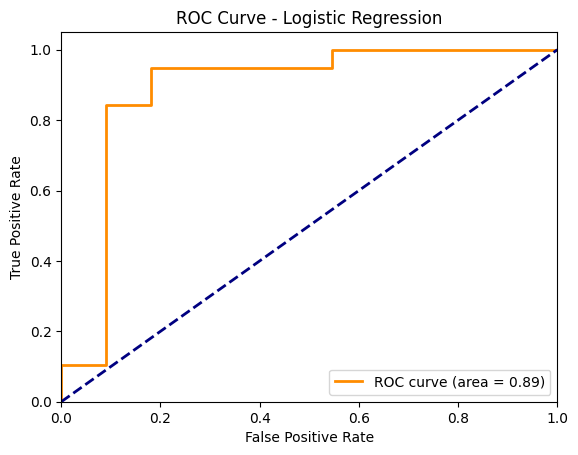

In [ ]:
# plot curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Logistic Regression')
plt.legend(loc="lower right")
plt.show()

* Bu kod, ROC eğrisini görselleştirir. `fpr` (False Positive Rate) ve `tpr` (True Positive Rate) değerleriyle ROC eğrisini çizer ve `roc_auc` değeriyle eğrinin altındaki alanı (AUC) etiketler. Ayrıca, çizimde rastgele tahminleri temsil eden bir "yokuş" çizgisi (diagonal line) ekler.

* Grafik üzerinde yanlış pozitif oranı ve doğru pozitif oranı etiketleri ile ROC eğrisinin başarı düzeyi görselleştirilir.

 * Yani buradan anlamış olduğumuz bizim regrasyon modelimiz oldukça iyi ve doğru bir tahmin veriyor.

#### Lojistik Regresyon Hiperparametre Ayarı

In [ ]:
# Hiperparametre ızgarası
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],  # Ceza parametresi
    'solver': ['liblinear', 'lbfgs', 'saga']  # Çözüm yöntemleri
}

* Bu kod, lojistik regresyon modelinin **hiperparametrelerini** ayarlamak için bir **ızgara** oluşturur. Burada, **C (ceza parametresi)** ve **solver (çözümleyici metodu)** için farklı olasılıklar belirlenir. Bu sayede modelin performansı optimize edilir.

In [ ]:
# GridSearchCV ile en iyi parametreleri bulma
grid_search = GridSearchCV(estimator=LogisticRegression(max_iter=1000, random_state=42),
                           param_grid=param_grid,
                           cv=5,
                           scoring='accuracy')
grid_search.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=1000, random_state=42),
             param_grid={'C': [0.01, 0.1, 1, 10, 100],
                         'solver': ['liblinear', 'lbfgs', 'saga']},
             scoring='accuracy')

**GridSearchCV** kullanarak lojistik regresyon modeli için en iyi hiperparametreleri bulur. İşlemler şu şekilde gerçekleşir:

- **GridSearchCV**: Lojistik regresyon modelini, belirtilen **param_grid** içindeki parametre kombinasyonlarıyla değerlendirir.
- **param_grid**: 'C' ceza parametresi ve 'solver' çözümleyici metodu için farklı değerler içerir.
- **cv=5**: 5 katlamalı çapraz doğrulama kullanarak modelin doğruluğu değerlendirilir.
- **scoring='accuracy'**: Modelin performansı doğruluk (accuracy) metriği ile değerlendirilir.
- **fit(x_train, y_train)**: Model, eğitim verisi ile en iyi parametreleri bulmak için eğitilir.

Bu işlem, en iyi parametrelerle en yüksek doğruluğu elde etmek amacıyla yapılır.

In [ ]:
# En iyi parametreler
print("En iyi parametreler: ", grid_search.best_params_)

En iyi parametreler:  {'C': 1, 'solver': 'lbfgs'}


In [ ]:
# En iyi modeli değerlendirme
best_logreg = grid_search.best_estimator_
y_pred_best_logreg = best_logreg.predict(x_test)

 * Yazdığım kod **grid_search.best_estimator_** ile **GridSearchCV** tarafından bulunan **en iyi** parametrelerle **eğitilmiş** modeli alır ve **best_model.predict(x_test)** ile test verisi üzerinde **tahmin** yapar.

In [ ]:
print("En iyi model doğruluk skoru: ", accuracy_score(y_test, y_pred_best_logreg))
print("Sınıflandırma Raporu:\n", classification_report(y_test, y_pred_best_logreg))

En iyi model doğruluk skoru:  0.8666666666666667
Sınıflandırma Raporu:
               precision    recall  f1-score   support

           0       0.82      0.82      0.82        11
           1       0.89      0.89      0.89        19

    accuracy                           0.87        30
   macro avg       0.86      0.86      0.86        30
weighted avg       0.87      0.87      0.87        30



* **accuracy_score(y_test, y_pred_best)** ile modelin doğruluk skorunu hesaplar ve **classification_report(y_test, y_pred_best)** ile daha detaylı **sınıflandırma** raporu alır.

Sonuç olarak **Lojistik regresyon** modelimiz **%86** oranda doğruluk düzeyi sağlıyor.

In [ ]:
# En iyi modelin ROC Curve'ü
y_pred_best_prob = best_logreg.predict_proba(x_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_best_prob)
roc_auc = auc(fpr, tpr)


* Sonuç:
  * Bu kod bloğunda, "en iyi model" olarak seçilen **Logistic Regression (best_logreg)** modelinin ROC eğrisi ve AUC değeri hesaplanmaktadır. **FPR** ve **TPR** değerleri, modelin farklı eşiklerde nasıl bir performans gösterdiğini anlamamızı sağlar.
  * AUC değeri ise modelin genel sınıflandırma kapasitesini özetler.

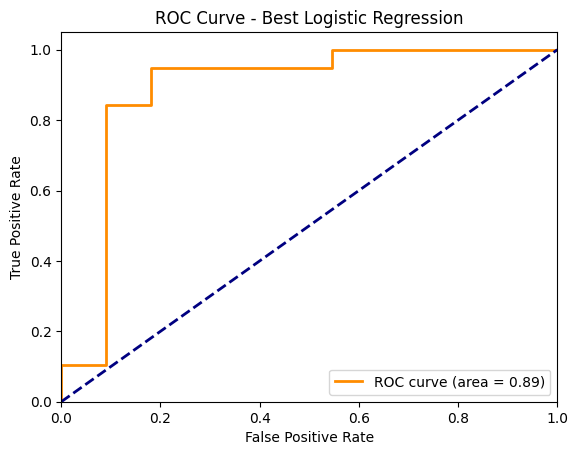

In [ ]:
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Best Logistic Regression')
plt.legend(loc="lower right")
plt.show()

* Kodun amacı, modelin sınıflandırma performansını grafiksel olarak göstermek ve AUC değerini vurgulamaktır.

* Bu görseldeki **AUC = 0.89**, modelin pozitif ve negatif sınıfları iyi bir şekilde ayırdığını gösteriyor.

### Support Vector Mechanism (SVM)

In [ ]:
# SVM Modeli
svm = SVC(probability=True, random_state=42)

* **svm = SVC()** ile bir **Support Vector Machine (SVM)** modelini tanımlıyorum.

* Bu model, sınıflandırma problemlerinde doğrusal olmayan verilerle çalışmak için kullanılır.

In [ ]:
# Model eğitimi
svm.fit(x_train, y_train)

SVC(probability=True, random_state=42)

* SVM **(Support Vector Machine)** modelini eğitim verisi **(x_train)** ve hedef değişkeni **(y_train)** ile eğitir.

In [ ]:
# Test seti üzerinde tahmin
y_pred_svm = svm.predict(x_test)

* Bu satırda, **`y_pred_svm = svm.predict(x_test)`** kodu, eğitilmiş **SVM (Support Vector Machine)** modelini kullanarak test verisi **(`x_test`)** üzerinde tahminler yapar.  

* Model, test setindeki verileri kullanarak sınıflandırma yapar ve tahmin edilen sınıfları **`y_pred_svm`** değişkenine kaydeder.

In [ ]:
# Model değerlendirme
print("SVM Doğruluk Skoru: ", accuracy_score(y_test, y_pred_svm))
print("Sınıflandırma Raporu: \n", classification_report(y_test, y_pred_svm))

SVM Doğruluk Skoru:  0.8
Sınıflandırma Raporu: 
               precision    recall  f1-score   support

           0       0.69      0.82      0.75        11
           1       0.88      0.79      0.83        19

    accuracy                           0.80        30
   macro avg       0.79      0.80      0.79        30
weighted avg       0.81      0.80      0.80        30



* Bu kısımda **SVM** algoritmasının sağladığı **doğruluk oranını** ve **sınıflandırma raporu**  verilerini listeliyoruz.

* Bu bilgi doğrultusunda **SVM** algoritmamızın **%80** doğruluk oranına sahip olduğunu tespit ediyoruz.

In [ ]:
# ROC Curve
y_pred_prob_svm = svm.predict_proba(x_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob_svm)
roc_auc = auc(fpr, tpr)

* `predict_proba(x_test)` fonksiyonu ile SVM modelinin test verisi üzerinde tahmin edilen olasılıklarını hesaplıyorum. `[:, 1]` ifadesiyle yalnızca pozitif sınıfa ait olasılıkları alıyorum.

* Bu kod ile, **`roc_curve`** fonksiyonu kullanılarak **gerçek etiketler** **(`y_test`)** ve **tahmin edilen olasılıklar** **(`y_pred_prob_svm`)** ile ROC eğrisinin **False Positive Rate (FPR)** ve **True Positive Rate (TPR)** değerleri hesaplanır. **`auc`** fonksiyonu ise bu eğrinin altındaki alanı (**AUC - Area Under the Curve**) hesaplar ve modelin **genel performansını** ölçer.

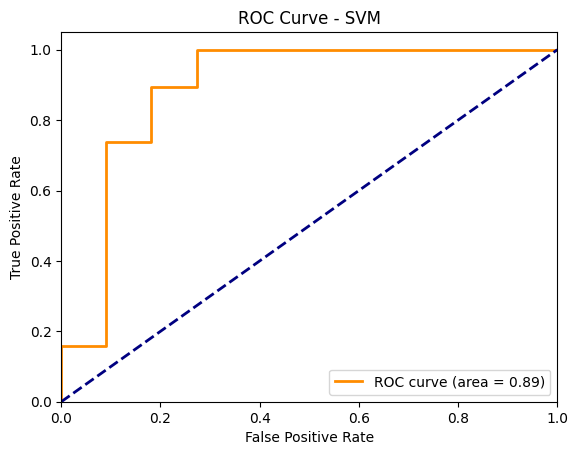

In [ ]:
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - SVM')
plt.legend(loc="lower right")
plt.show()

* Bu kod, ROC eğrisini görselleştirir. `fpr` (False Positive Rate) ve `tpr` (True Positive Rate) değerleri ile ROC eğrisini çizer ve `roc_auc` değeriyle eğrinin altındaki alanı (AUC) etiketler. Ayrıca, çizimde rastgele tahminleri temsil eden bir "yokuş" çizgisi (diagonal line) ekler.


In [ ]:
# SVM için hiperparametre ayarları
param_grid_svm = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto']
}

* Bu kod, SVM modelimin hiperparametrelerini ayarlamak için farklı değerler dener.

* **C** (ceza parametresi), **kernel** (çekirdek fonksiyonu) ve **gamma** (çekirdek fonksiyonunun ağırlığı) gibi parametreler için çeşitli seçenekler belirleyerek, en iyi performansı elde edebilmek için modelin hiperparametrelerini optimize etmeyi hedefliyorum.

In [ ]:
grid_search_svm = GridSearchCV(estimator=SVC(probability=True, random_state=42), param_grid=param_grid_svm, cv=5, scoring='accuracy')
grid_search_svm.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=SVC(probability=True, random_state=42),
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'rbf', 'poly']},
             scoring='accuracy')

* Bu kod, **SVM modelinin** en iyi hiperparametrelerini bulmak için **GridSearchCV** kullanır. **param_grid_svm** ile farklı parametre kombinasyonları test edilir, 5 katlamalı çapraz doğrulama ile doğruluk ölçülür.

* Detaylı anlatımını **Lojistik  regresyon**  kısmında bulabilirsiniz.

In [ ]:
print("En iyi parametreler: ", grid_search_svm.best_params_)

En iyi parametreler:  {'C': 1, 'gamma': 'scale', 'kernel': 'linear'}


In [ ]:
best_svm = grid_search_svm.best_estimator_
y_pred_best_svm = best_svm.predict(x_test)

* Bu kodda, **GridSearchCV** ile bulduğum en iyi **SVM modelini** seçip, bu modelle **test verisi üzerinde tahminler yapıyorum**.

In [ ]:
print("En iyi model doğruluk skoru: ", accuracy_score(y_test, y_pred_best_svm))
print("Sınıflandırma Raporu:\n", classification_report(y_test, y_pred_best_svm))

En iyi model doğruluk skoru:  0.7666666666666667
Sınıflandırma Raporu:
               precision    recall  f1-score   support

           0       0.64      0.82      0.72        11
           1       0.88      0.74      0.80        19

    accuracy                           0.77        30
   macro avg       0.76      0.78      0.76        30
weighted avg       0.79      0.77      0.77        30



* **accuracy_score(y_test, y_pred_best_svm)** ile modelin doğruluk skorunu hesaplar ve **classification_report(y_test, y_pred_best_svm)** ile daha detaylı **sınıflandırma** raporu alır.

Sonuç olarak **SVM** modelimiz **%76** oranda doğruluk düzeyi sağlıyor.

In [ ]:
# ROC Curve (Optimize edilmiş SVM)
y_pred_best_prob_svm = best_svm.predict_proba(x_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_best_prob_svm)
roc_auc = auc(fpr, tpr)

* Bu kodda, **en iyi SVM modelimin** ROC eğrisini ve AUC değerini hesaplıyorum. **FPR** ve **TPR** ile modelin farklı eşiklerdeki performansını gözlemliyorum.

* **AUC** değeri ise modelin genel sınıflandırma başarısını özetliyor.

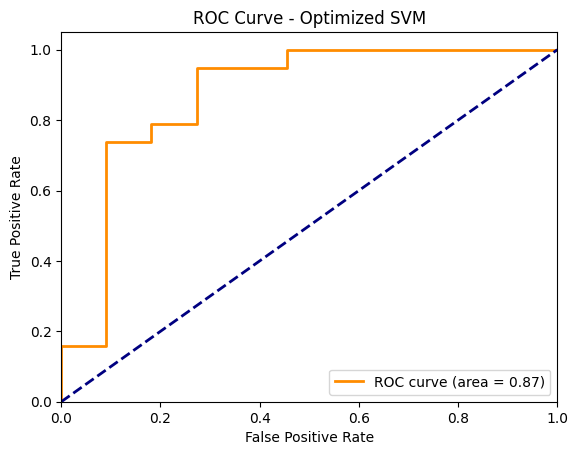

In [ ]:
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Optimized SVM')
plt.legend(loc="lower right")
plt.show()

* Kodun amacı, modelin sınıflandırma performansını grafiksel olarak göstermek ve AUC değerini vurgulamaktır.

* Bu görseldeki **AUC = 0.87**, modelin pozitif ve negatif sınıfları iyi bir şekilde ayırdığını gösteriyor.

###  Decision Tree (DT)

In [ ]:
# Decision Tree Modeli
dt = DecisionTreeClassifier(random_state=42)

* **dt = DecisionTreeClassifier(random_state=42)** ile bir **Decision Tree (Karar Ağacı)** modelini tanımlıyorum.

* Bu model, veriyi dallara ayırarak sınıflandırma yapmamı sağlıyor ve özellikle açıklanabilirliği yüksek bir yöntem sunuyor.

In [ ]:
# Model eğitimi
dt.fit(x_train, y_train)

DecisionTreeClassifier(random_state=42)

* Karar Ağacı **(Decision Tree)** modelini, eğitim verisi **(x_train)** ve hedef değişkeni **(y_train)** kullanarak eğitiyorum.

In [ ]:
# Test seti üzerinde tahmin
y_pred_dt = dt.predict(x_test)

* Bu satırda, **`y_pred_dt = dt.predict(x_test)`** kodu, eğitilmiş **Karar Ağacı (Decision Tree)** modelini kullanarak test verisi **(`x_test`)** üzerinde tahminler yapar ve tahmin edilen sınıfları **`y_pred_dt`** değişkenine kaydeder.

In [ ]:
# Model değerlendirme
print("Decision Tree Doğruluk Skoru: ", accuracy_score(y_test, y_pred_dt))
print("Sınıflandırma Raporu: \n", classification_report(y_test, y_pred_dt))

Decision Tree Doğruluk Skoru:  0.7
Sınıflandırma Raporu: 
               precision    recall  f1-score   support

           0       0.57      0.73      0.64        11
           1       0.81      0.68      0.74        19

    accuracy                           0.70        30
   macro avg       0.69      0.71      0.69        30
weighted avg       0.72      0.70      0.71        30



* Bu kısımda, **Karar Ağacı (Decision Tree)** modelinin **doğruluk oranını** ve **sınıflandırma raporunu** değerlendiriyorum.

* Bu sayede, modelin performansını ölçerek doğruluk oranını ve sınıflandırma başarısını analiz ediyorum.

In [ ]:
# ROC Curve
y_pred_prob_dt = dt.predict_proba(x_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob_dt)
roc_auc = auc(fpr, tpr)

* **`predict_proba(x_test)`** fonksiyonu ile Karar Ağacı (Decision Tree) modelinin test verisi üzerinde tahmin ettiği olasılıkları hesaplıyorum ve pozitif sınıfa ait olanları seçiyorum.  

* Bu işlemle, **`roc_curve`** fonksiyonu kullanarak **yanlış pozitif oranı (FPR)** ve **doğru pozitif oranı (TPR)** değerlerini hesaplıyor ve **`auc`** ile ROC eğrisinin altındaki alanı (AUC) ölçerek modelin genel performansını değerlendiriyorum.

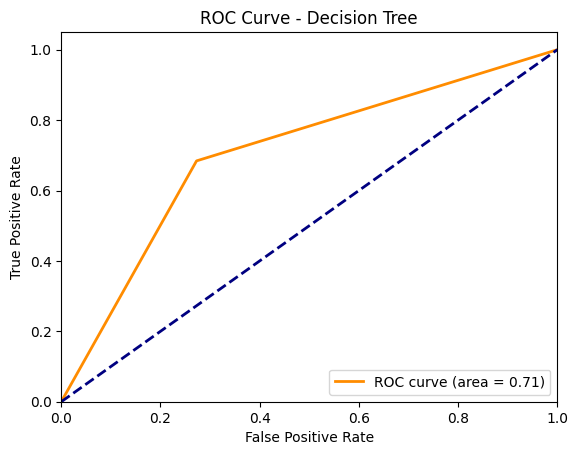

In [ ]:
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Decision Tree')
plt.legend(loc="lower right")
plt.show()

* Bu kodda, Karar Ağacı modelinin ROC eğrisini görselleştiriyorum. **`fpr`** (False Positive Rate) ve **`tpr`** (True Positive Rate) değerleri kullanılarak eğri çiziliyor ve **`roc_auc`** değeri ile eğrinin altındaki alan (AUC) belirtiliyor. Ayrıca, rastgele tahminlerin referansı olarak bir diyagonal çizgi ekleyerek modelin performansını net bir şekilde ortaya koyuyorum.

In [ ]:
# Decision Tree için hiperparametre ayarları
param_grid_dt = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 10],
    'min_samples_leaf': [1, 2, 4]
}

* Bu kod, Karar Ağacı modelim için hiperparametre optimizasyonu yapmak amacıyla bir parametre ızgarası oluşturuyor.

* **`max_depth`** (ağacın maksimum derinliği), **`min_samples_split`** (bir düğümü bölmek için gereken minimum örnek sayısı) ve **`min_samples_leaf`** (yaprak düğümünde bulunması gereken minimum örnek sayısı) gibi parametreler için farklı kombinasyonlar belirleyerek modelin en iyi performansı göstermesini sağlamayı hedefliyorum.

In [ ]:
grid_search_dt = GridSearchCV(estimator=DecisionTreeClassifier(random_state=42), param_grid=param_grid_dt, cv=5, scoring='accuracy')
grid_search_dt.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'max_depth': [3, 5, 10, None],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 10]},
             scoring='accuracy')

* Bu kod, **Karar Ağacı modelim** için en iyi hiperparametreleri bulmak amacıyla **GridSearchCV** kullanıyor. **`param_grid_dt`** ile belirlediğim parametre kombinasyonlarını test ediyor ve 5 katlamalı çapraz doğrulama ile doğruluk skoru üzerinden değerlendiriyor.  

* Detaylı anlatımı, daha önce paylaştığım **Lojistik Regresyon** kısmında bulabilirsiniz.

In [ ]:
print("En iyi parametreler: ", grid_search_dt.best_params_)

En iyi parametreler:  {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10}


In [ ]:
best_dt = grid_search_dt.best_estimator_
y_pred_best_dt = best_dt.predict(x_test)

* Bu kodda, **GridSearchCV** ile elde ettiğim en iyi **Karar Ağacı modelini** (**`best_dt`**) seçip, bu modelle **test verisi üzerinde tahminler yapıyorum**.

In [ ]:
print("En iyi model doğruluk skoru: ", accuracy_score(y_test, y_pred_best_dt))
print("Sınıflandırma Raporu:\n", classification_report(y_test, y_pred_best_dt))

En iyi model doğruluk skoru:  0.8
Sınıflandırma Raporu:
               precision    recall  f1-score   support

           0       0.78      0.64      0.70        11
           1       0.81      0.89      0.85        19

    accuracy                           0.80        30
   macro avg       0.79      0.77      0.77        30
weighted avg       0.80      0.80      0.79        30



* Bu kodda, **`accuracy_score(y_test, y_pred_best_dt)`** ile **Karar Ağacı modelinin** doğruluk skorunu hesaplıyorum ve **`classification_report(y_test, y_pred_best_dt)`** ile daha detaylı **sınıflandırma raporu** alıyorum.

* Sonuç olarak, **Karar Ağacı modelimizin** **%80** doğruluk oranına sahip olduğunu tespit ediyorum.

In [ ]:
# ROC Curve (Optimize edilmiş Decision Tree)
y_pred_best_prob_dt = best_dt.predict_proba(x_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_best_prob_dt)
roc_auc = auc(fpr, tpr)

* Bu kodda, **en iyi Karar Ağacı modelimin** ROC eğrisini ve AUC değerini hesaplıyorum. **FPR** (False Positive Rate) ve **TPR** (True Positive Rate) ile modelin farklı eşiklerdeki performansını gözlemliyorum.

* **AUC** değeri ise modelin genel sınıflandırma başarısını özetliyor ve modelin ne kadar başarılı olduğunu gösteriyor.

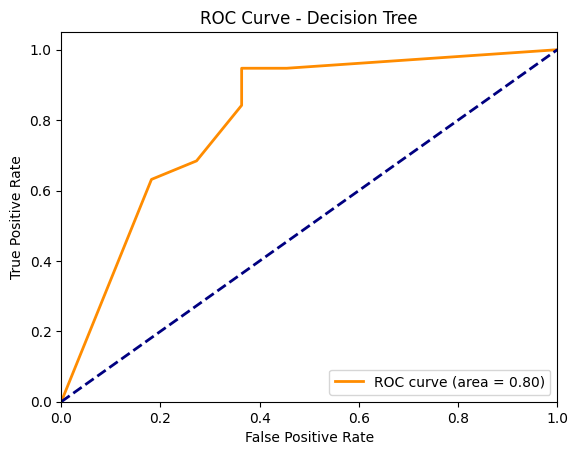

In [ ]:
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Decision Tree')
plt.legend(loc="lower right")
plt.show()

* Kodun amacı, modelin sınıflandırma performansını grafiksel olarak göstermek ve AUC değerini vurgulamaktır.

* Bu görseldeki **AUC = 0.80**, modelin pozitif ve negatif sınıfları iyi bir şekilde ayırdığını gösteriyor.

### Random Forest

In [ ]:
# Random Forest Modeli
rf = RandomForestClassifier(random_state=42)

* **rf = RandomForestClassifier(random_state=42)** ile bir Random Forest modelini tanımlıyorum.

* Random Forest, **birden fazla karar ağacını** bir araya getirerek daha güçlü ve stabil tahminler yapar.

In [ ]:
# Model eğitimi
rf.fit(x_train, y_train)

RandomForestClassifier(random_state=42)

* **Random Forest (RF)** modelini, eğitim verisi **(x_train)** ve hedef değişkeni **(y_train)** kullanarak eğitiyorum.

In [ ]:
# Test seti üzerinde tahmin
y_pred_rf = rf.predict(x_test)

* Bu satırda, **`y_pred_rf = rf.predict(x_test)`** kodu, eğitilmiş **Random Forest (RF)** modelini kullanarak test verisi **(`x_test`)** üzerinde tahminler yapar ve tahmin edilen sınıfları **`y_pred_rf`** değişkenine kaydeder.

In [ ]:
# Model değerlendirme
print("Random Forest Doğruluk Skoru: ", accuracy_score(y_test, y_pred_rf))
print("Sınıflandırma Raporu: \n", classification_report(y_test, y_pred_rf))

Random Forest Doğruluk Skoru:  0.8
Sınıflandırma Raporu: 
               precision    recall  f1-score   support

           0       0.69      0.82      0.75        11
           1       0.88      0.79      0.83        19

    accuracy                           0.80        30
   macro avg       0.79      0.80      0.79        30
weighted avg       0.81      0.80      0.80        30



* Bu kısımda, **Random Forest (RF)** modelinin **doğruluk oranını** ve **sınıflandırma raporunu** değerlendiriyorum.

* Bu sayede, modelin performansını ölçerek doğruluk oranını ve sınıflandırma başarısını analiz ediyorum.

In [ ]:
# ROC Curve
y_pred_prob_rf = rf.predict_proba(x_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob_rf)
roc_auc = auc(fpr, tpr)

* **`predict_proba(x_test)`** fonksiyonu ile **Random Forest** modelinin test verisi üzerinde tahmin ettiği olasılıkları hesaplıyorum ve **pozitif sınıfa** ait olanları seçiyorum.

* Bu işlemle, **`roc_curve`** fonksiyonu kullanarak **yanlış pozitif oranı (FPR)** ve **doğru pozitif oranı (TPR)** değerlerini hesaplıyorum. **`auc`** fonksiyonu ise ROC eğrisinin altındaki alanı (AUC) ölçerek modelin genel performansını değerlendiriyorum.

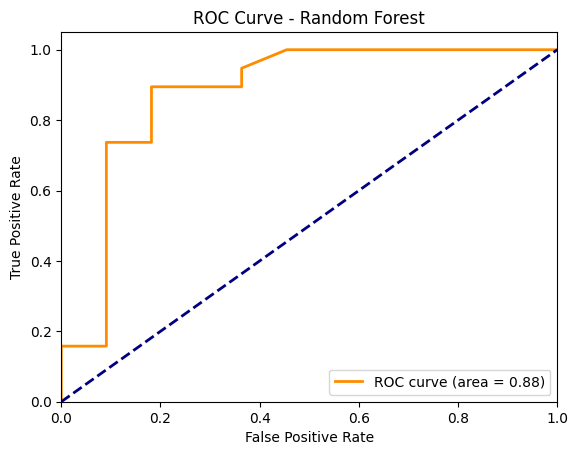

In [ ]:
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Random Forest')
plt.legend(loc="lower right")
plt.show()

* Bu kodda, **Random Forest** modelinin ROC eğrisini görselleştiriyorum. **FPR (False Positive Rate)** ve **TPR (True Positive Rate)** değerleri kullanılarak eğri çiziliyor ve **AUC (Area Under the Curve)** değeri ile eğrinin altındaki alan belirtiliyor.

* Ayrıca, rastgele tahminlerin referansı olarak bir diyagonal çizgi ekleyerek modelin performansını net bir şekilde ortaya koyuyorum.

In [ ]:
# Random Forest için hiperparametre ayarları
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

* Bu kod, **Random Forest** modelim için hiperparametre optimizasyonu yapmak amacıyla bir parametre ızgarası oluşturuyor.

* **`n_estimators`** (ağaç sayısı), **`max_depth`** (ağacın maksimum derinliği), **`min_samples_split`** (bir düğümü bölmek için gereken minimum örnek sayısı) ve **`min_samples_leaf`** (yaprak düğümünde bulunması gereken minimum örnek sayısı) gibi parametreler için farklı kombinasyonlar belirleyerek modelin en iyi performansı göstermesini sağlamayı hedefliyorum.

In [ ]:
grid_search_rf = GridSearchCV(estimator=RandomForestClassifier(random_state=42), param_grid=param_grid_rf, cv=5, scoring='accuracy')
grid_search_rf.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [5, 10, 20, None],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             scoring='accuracy')

* Bu kod, **Random Forest** modelim için en iyi hiperparametreleri bulmak amacıyla **GridSearchCV** kullanıyor. **`param_grid_rf`** ile belirlediğim parametre kombinasyonlarını test ediyor ve 5 katlamalı çapraz doğrulama ile doğruluk skoru üzerinden değerlendiriyor.

* Detaylı anlatımı, daha önce paylaştığım **Lojistik Regresyon** kısmında bulabilirsiniz.

In [ ]:
print("En iyi parametreler: ", grid_search_rf.best_params_)

En iyi parametreler:  {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 100}


In [ ]:
best_rf = grid_search_rf.best_estimator_
y_pred_best_rf = best_rf.predict(x_test)

* Bu kodda, **GridSearchCV** ile elde ettiğim en iyi **Random Forest** modelini (**best_rf**) seçiyorum ve bu modelle **test verisi** üzerinde tahminler yapıyorum.

* **y_pred_best_rf** değişkeni, test setindeki tahmin edilen sınıfları içeriyor.

In [ ]:
print("En iyi model doğruluk skoru: ", accuracy_score(y_test, y_pred_best_rf))
print("Sınıflandırma Raporu:\n", classification_report(y_test, y_pred_best_rf))

En iyi model doğruluk skoru:  0.8333333333333334
Sınıflandırma Raporu:
               precision    recall  f1-score   support

           0       0.75      0.82      0.78        11
           1       0.89      0.84      0.86        19

    accuracy                           0.83        30
   macro avg       0.82      0.83      0.82        30
weighted avg       0.84      0.83      0.83        30



* Bu kodda, **Random Forest modelinin** doğruluk skorunu **accuracy_score(y_test, y_pred_best_rf)** ile hesaplıyorum ve daha detaylı bir değerlendirme için **classification_report(y_test, y_pred_best_rf)** fonksiyonunu kullanarak sınıflandırma raporunu alıyorum.

* Sonuç olarak, **Random Forest modelimizin** %83 doğruluk oranına sahip olduğunu tespit ediyorum.

In [ ]:
# ROC Curve (Optimize edilmiş Random Forest)
y_pred_best_prob_rf = best_rf.predict_proba(x_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_best_prob_rf)
roc_auc = auc(fpr, tpr)

* Bu kodda, **en iyi Random Forest modelinin** ROC eğrisini hesaplıyorum. **y_pred_best_prob_rf** ile modelin test verisi üzerindeki olasılık tahminlerini alıp, **FPR** (False Positive Rate) ve **TPR** (True Positive Rate) değerlerini kullanarak ROC eğrisini çiziyorum.

* **AUC** (Area Under Curve) değeri ise modelin sınıflandırma performansını özetler ve modelin genel başarısını ölçer.

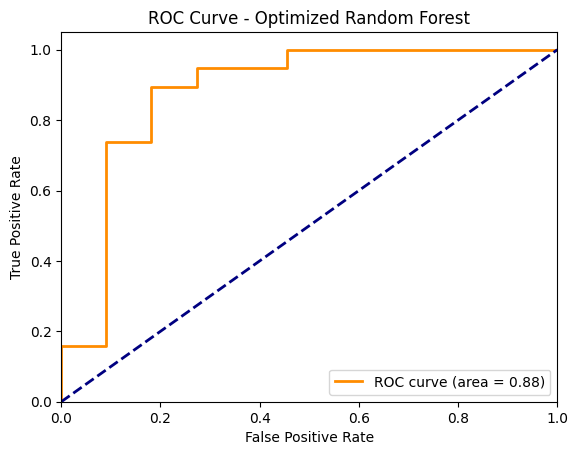

In [ ]:
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Optimized Random Forest')
plt.legend(loc="lower right")
plt.show()

* Kodun amacı, modelin sınıflandırma performansını grafiksel olarak göstermek ve AUC değerini vurgulamaktır.

* Bu görseldeki **AUC = 0.88**, modelin pozitif ve negatif sınıfları iyi bir şekilde ayırdığını gösteriyor.

### KNeighborsClassifier (KNN)

In [ ]:
# KNN Modeli
knn = KNeighborsClassifier()

* **KNN (K-Nearest Neighbors)** modelini, sınıflandırma işlemi yapmak için tanımlıyorum.

In [ ]:
# Model eğitimi
knn.fit(x_train, y_train)

KNeighborsClassifier()

* **KNN (K-Nearest Neighbors)** modelini, eğitim verisi **(x_train)** ve hedef değişkeni **(y_train)** ile eğitiyorum. Bu model, her bir veri noktasını sınıflandırmak için en yakın komşuları dikkate alır.

In [ ]:
# Test seti üzerinde tahmin
y_pred_knn = knn.predict(x_test)

* Bu satırda, **y_pred_knn = knn.predict(x_test)** kodu, eğitilmiş **KNN (K-Nearest Neighbors)** modelini kullanarak test verisi **(x_test)** üzerinde tahminler yapar ve tahmin edilen sınıfları **y_pred_knn** değişkenine kaydeder.

In [ ]:
# Model değerlendirme
print("KNN Doğruluk Skoru: ", accuracy_score(y_test, y_pred_knn))
print("Sınıflandırma Raporu: \n", classification_report(y_test, y_pred_knn))

KNN Doğruluk Skoru:  0.7666666666666667
Sınıflandırma Raporu: 
               precision    recall  f1-score   support

           0       0.67      0.73      0.70        11
           1       0.83      0.79      0.81        19

    accuracy                           0.77        30
   macro avg       0.75      0.76      0.75        30
weighted avg       0.77      0.77      0.77        30



* Bu kısımda, **KNN (K-Nearest Neighbors)** modelinin **doğruluk oranını** ve **sınıflandırma raporunu** değerlendiriyorum.

* Bu sayede, modelin performansını ölçerek doğruluk oranını ve sınıflandırma başarısını analiz ediyorum.


In [ ]:
# ROC Curve
y_pred_prob_knn = knn.predict_proba(x_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob_knn)
roc_auc = auc(fpr, tpr)

* **`predict_proba(x_test)`** fonksiyonu ile **KNN** modelinin test verisi üzerinde tahmin ettiği olasılıkları hesaplıyorum ve **pozitif sınıfa** ait olanları seçiyorum.

* Bu işlemle, **`roc_curve`** fonksiyonu kullanarak **yanlış pozitif oranı (FPR)** ve **doğru pozitif oranı (TPR)** değerlerini hesaplıyorum. **`auc`** fonksiyonu ise ROC eğrisinin altındaki alanı (AUC) ölçerek modelin genel performansını değerlendiriyorum.

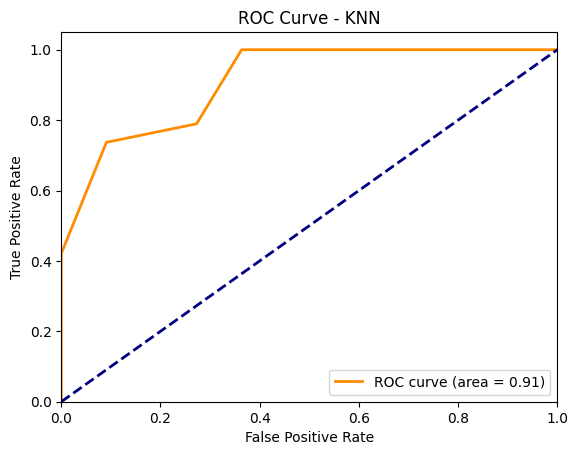

In [ ]:
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - KNN')
plt.legend(loc="lower right")
plt.show()

* Bu kodda, **KNN** modelinin ROC eğrisini görselleştiriyorum. **FPR (False Positive Rate)** ve **TPR (True Positive Rate)** değerleri kullanılarak eğri çiziliyor ve **AUC (Area Under the Curve)** değeri ile eğrinin altındaki alan belirtiliyor.

* Ayrıca, rastgele tahminlerin referansı olarak bir diyagonal çizgi ekleyerek modelin performansını net bir şekilde ortaya koyuyorum.


In [ ]:
# KNN için hiperparametre ayarları
param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9, 11],  # Komşu sayısı
    'weights': ['uniform', 'distance'],  # Ağırlık fonksiyonu
    'metric': ['euclidean', 'manhattan']  # Mesafe ölçütü
}

* Bu kod, **KNN** modelim için hiperparametre optimizasyonu yapmak amacıyla bir parametre ızgarası oluşturuyor.

* **`n_neighbors`** (komşu sayısı), **`weights`** (ağırlık fonksiyonu) ve **`metric`** (mesafe ölçütü) gibi parametreler için farklı kombinasyonlar belirleyerek modelin en iyi performansı göstermesini sağlamayı hedefliyorum.

In [ ]:
grid_search_knn = GridSearchCV(estimator=KNeighborsClassifier(), param_grid=param_grid_knn, cv=5, scoring='accuracy')
grid_search_knn.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': [3, 5, 7, 9, 11],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

* Bu kod, **KNN** modelim için en iyi hiperparametreleri bulmak amacıyla **GridSearchCV** kullanıyor. **`param_grid_knn`** ile belirlediğim parametre kombinasyonlarını test ediyor ve 5 katlamalı çapraz doğrulama ile doğruluk skoru üzerinden değerlendiriyor.

* Detaylı anlatımı, daha önce paylaştığım **Lojistik Regresyon** kısmında bulabilirsiniz.


In [ ]:
# En iyi parametreler
print("En iyi parametreler: ", grid_search_knn.best_params_)

En iyi parametreler:  {'metric': 'manhattan', 'n_neighbors': 3, 'weights': 'uniform'}


In [ ]:
# Optimize edilmiş model
best_knn = grid_search_knn.best_estimator_
y_pred_best_knn = best_knn.predict(x_test)

* Bu kodda, **GridSearchCV** ile elde ettiğim en iyi **KNN** modelini (**best_knn**) seçiyorum ve bu modelle **test verisi** üzerinde tahminler yapıyorum.

* **y_pred_best_knn** değişkeni, test setindeki tahmin edilen sınıfları içeriyor.

In [ ]:
# Performans değerlendirme
print("En iyi model doğruluk skoru: ", accuracy_score(y_test, y_pred_best_knn))
print("Sınıflandırma Raporu:\n", classification_report(y_test, y_pred_best_knn))

En iyi model doğruluk skoru:  0.8
Sınıflandırma Raporu:
               precision    recall  f1-score   support

           0       0.73      0.73      0.73        11
           1       0.84      0.84      0.84        19

    accuracy                           0.80        30
   macro avg       0.78      0.78      0.78        30
weighted avg       0.80      0.80      0.80        30



* Bu kodda, **KNN modelinin** doğruluk skorunu **accuracy_score(y_test, y_pred_best_knn)** ile hesaplıyorum ve daha detaylı bir değerlendirme için **classification_report(y_test, y_pred_best_knn)** fonksiyonunu kullanarak sınıflandırma raporunu alıyorum.

* Sonuç olarak, **KNN modelimizin** **%80** doğruluk oranına sahip olduğunu tespit ediyorum.

In [ ]:
# ROC Curve (Optimize edilmiş KNN)
y_pred_best_prob_knn = best_knn.predict_proba(x_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_best_prob_knn)
roc_auc = auc(fpr, tpr)

* Bu kodda, **en iyi KNN modelinin** ROC eğrisini hesaplıyorum. **y_pred_best_prob_knn** ile modelin test verisi üzerindeki olasılık tahminlerini alıp, **FPR** (False Positive Rate) ve **TPR** (True Positive Rate) değerlerini kullanarak ROC eğrisini çiziyorum.

* **AUC** (Area Under Curve) değeri, modelin sınıflandırma performansını özetler ve modelin genel başarısını ölçer.

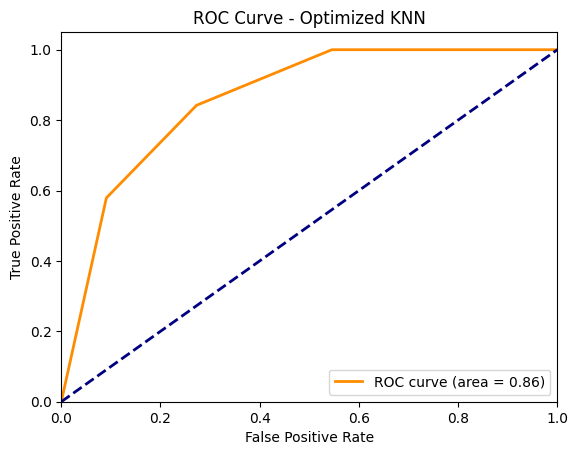

In [ ]:
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Optimized KNN')
plt.legend(loc="lower right")
plt.show()

* Kodun amacı, modelin sınıflandırma performansını grafiksel olarak göstermek ve AUC değerini vurgulamaktır.

* Bu görseldeki **AUC = 0.86**, modelin pozitif ve negatif sınıfları ayırma başarısını iyi bir şekilde gösteriyor. Bu, modelin genel olarak doğru sınıflandırma yapma kapasitesinin yüksek olduğunu belirtir.

<a id='16'></a>
## Veri Doğrulama Yöntemlerinin Karşılaştırılması

In [ ]:
# Modellerin listesi
models = {
    'Logistic Regression': LogisticRegression(),
    'SVM': SVC(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'KNN': KNeighborsClassifier()
}

# Eğitim ve test setlerinin hazırlanmış olduğundan emin olun
# Bu adımda `x_train`, `x_test`, `y_train`, `y_test` hazır olduğunu varsayıyoruz.

# Model doğruluklarının saklanacağı liste
accuracy_scores = []

# Her modelin doğruluğunu hesapla
for model_name, model in models.items():
    model.fit(x_train, y_train)  # Eğitim verisiyle eğit
    y_pred = model.predict(x_test)  # Test verisi üzerinde tahmin yap
    accuracy = accuracy_score(y_test, y_pred)  # Doğruluk skorunu hesapla
    accuracy_scores.append(accuracy)  # Doğruluk skorunu listeye ekle

# Doğruluk skorlarını görmek için
print(dict(zip(models.keys(), accuracy_scores)))

{'Logistic Regression': 0.8666666666666667, 'SVM': 0.8, 'Decision Tree': 0.7, 'Random Forest': 0.8666666666666667, 'KNN': 0.7666666666666667}


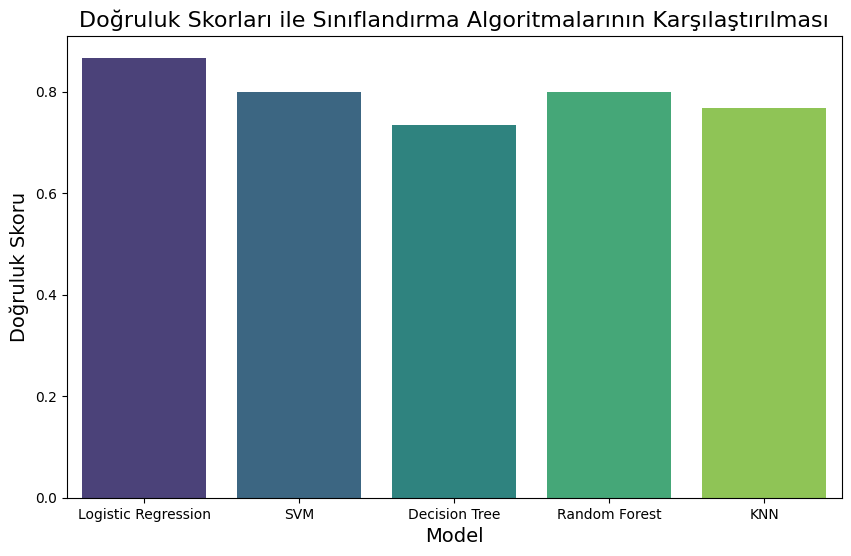

In [ ]:
# Doğruluk skorları daha önce hesaplandı, şimdi görselleştirme adımına geçelim
# Modellerin listesi
models = {
    'Logistic Regression': LogisticRegression(),
    'SVM': SVC(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'KNN': KNeighborsClassifier()
}

# Model doğruluklarının saklanacağı liste
accuracy_scores = []

# Her modelin doğruluğunu hesapla
for model_name, model in models.items():
    model.fit(x_train, y_train)  # Eğitim verisiyle eğit
    y_pred = model.predict(x_test)  # Test verisi üzerinde tahmin yap
    accuracy = accuracy_score(y_test, y_pred)  # Doğruluk skorunu hesapla
    accuracy_scores.append(accuracy)  # Doğruluk skorunu listeye ekle

# Bar grafiği ile doğruluk skorlarını görselleştirme
plt.figure(figsize=(10, 6))
sns.barplot(x=list(models.keys()), y=accuracy_scores, palette='viridis')

# Başlık ve etiketler
plt.title('Doğruluk Skorları ile Sınıflandırma Algoritmalarının Karşılaştırılması', fontsize=16)
plt.xlabel('Model', fontsize=14)
plt.ylabel('Doğruluk Skoru', fontsize=14)
plt.show()

* Toplamda 5 farklı algoritma çalıştırdım: Logistic Regression, Support Vector Machine (SVM), Decision Tree, Random Forest ve KNeighborsClassifier (KNN). Bu algoritmaların doğruluk skorlarını karşılaştırdığımda **Logistic Regression** en yüksek doğruluk skoruna sahip oldu.

* Görsele göre değerlendirildiğinde **Logistic Regression** en iyi sonuç veren algoritmadır.

## Karmaşıklık Matrisi Ve Değer Kıyaslaması - Confusion Matrisi

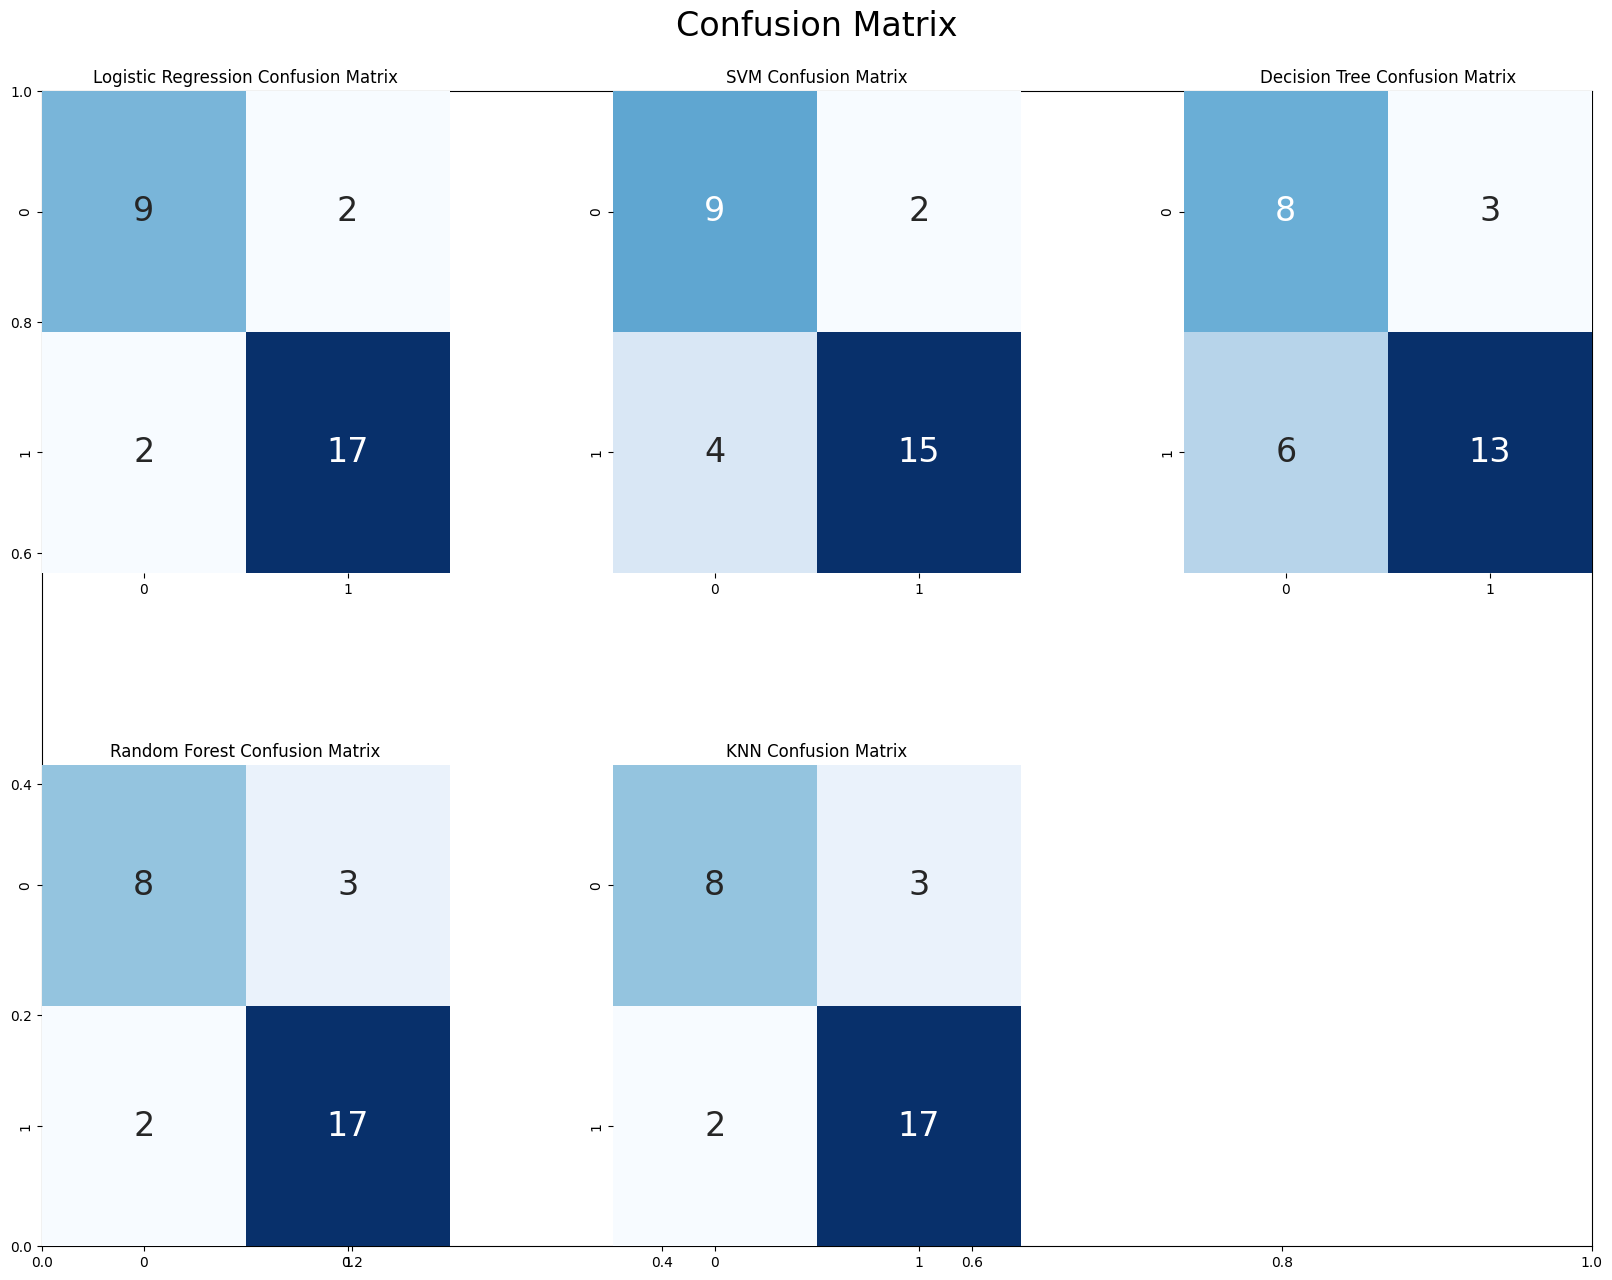

In [ ]:
# Modelleri bir sözlükte tanımlama
models = {
    'Logistic Regression': LogisticRegression(),
    'SVM': SVC(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'KNN': KNeighborsClassifier(n_neighbors=3)
}

# Eğitim ve test verisini oluşturmuş olmalısınız (X_train, X_test, y_train, y_test)
# Model sonuçlarını saklamak için bir sözlük
confusion_matrices = {}

# Her bir modeli eğit ve test et
for model_name, model in models.items():
    model.fit(x_train, y_train)  # Modeli eğitim verisiyle eğit
    y_pred = model.predict(x_test)  # Test verisiyle tahmin yap

    # Confusion Matrix hesapla
    confusion_matrices[model_name] = confusion_matrix(y_test, y_pred)

# Görselleştirme: Confusion Matrix
plt.figure(figsize=(20, 15))
plt.title("Confusion Matrix", fontsize=24, pad=40)
plt.subplots_adjust(wspace=0.4, hspace=0.4)

# Her model için confusion matrix'i ayrı bir subplot olarak çiz
for i, (model_name, conf_matrix) in enumerate(confusion_matrices.items(), start=1):
    plt.subplot(2, 3, i)  # 2 satır 3 sütunluk bir grid düzeni
    plt.title(f"{model_name} Confusion Matrix")
    sns.heatmap(conf_matrix, annot=True, cmap="Blues", fmt="d", cbar=False, annot_kws={"size": 24})

plt.show()


* Karmaşıklık matrisi şu şekilde yapılandırılmıştır:

  * **True Negative (TN):** Gerçekten hasta olmayan ve doğru tahmin edilenler **(matrisin [0][0] pozisyonu)**.
  * **False Positive (FP):** Gerçekten hasta olmayan, ancak hasta olarak tahmin edilenler **(matrisin [0][1] pozisyonu)**.
  * **False Negative (FN):** Gerçekten hasta olan, ancak hasta olmadığı tahmin edilenler **(matrisin [1][0] pozisyonu)**.
  * **True Positive (TP):** Gerçekten hasta olan ve doğru tahmin edilenler **(matrisin [1][1] pozisyonu)**.
* Bu matrisler, sınıflandırma modellerinin doğruluğunu ve özellikle gerçek hasta durumlarını doğru tahmin etme yeteneklerini gösterir.

* **Model Analizleri:**

  * **Logistic Regression:**

    * TP: 17, TN: 9
    * FP: 2, FN: 2
  * Model, doğru tahminlerde iyi performans sergilese de bazı yanlış negatif (FN) tahminlere sahiptir.
  * **Support Vector Machine (SVM):**

    * TP: 15, TN: 9
    * FP: 2, FN: 4
  * FN değeri Logistic Regression'a göre daha yüksek olduğundan, hasta olanların doğru tespiti biraz daha zayıf.
  * **Decision Tree:**

    * TP: 15, TN: 7
    * FP: 4, FN: 4
  * TN ve TP değerleri diğer modellerle karşılaştırıldığında biraz daha düşük.
  * **Random Forest:**
    * TP: 15, TN: 9
    * FP: 2, FN: 4
  * Genel doğruluk açısından iyi bir performans sergilemekte, FN ve FP oranları dengelidir.
  * **K-Nearest Neighbors (KNN):**

    * TP: 17, TN: 8
    * FP: 3, FN: 2
  * Model, düşük FN değeri ile hasta olanları doğru tahminde en iyi performansı göstermektedir.
  * **Sonuç Değerlendirmesi:**

  * Logistic Regression ve KNN, düşük FN değerleriyle hasta olanları doğru tahmin etme konusunda öne çıkmaktadır.
  * Random Forest, dengeli bir FP ve FN oranı sunarak genel doğruluk açısından başarılıdır.
  * Bununla birlikte, FN değerleri (hastaları yanlış negatif tahmin etme) bir sağlık modeli için kritik öneme sahip olduğundan, KNN algoritması özellikle hasta olan bireyleri doğru tespit etmek için daha uygun bir seçenek olabilir.







<a id='17'></a>
## Sonuca Bağlı Detaylı Proje Tanıtımı

* Bu projede, bireylerin **kalp krizi riski** taşıyıp taşımadığını **tahmin etmeye** yönelik bir **makine öğrenmesi modeli** geliştirilmiştir. Çalışmada, sınıflandırma algoritmalarının **performansları** karşılaştırılmış ve en uygun yöntemin belirlenmesi hedeflenmiştir.  

* Veri hazırlık sürecinde, veri kümesindeki **eksik ve tutarsız veriler** temizlenmiş, **kategorik değişkenler** sayısal forma dönüştürülmüş ve **sayısal değişkenler** standartlaştırılmıştır. Ayrıca, hedef değişken belirlenerek verinin **sınıflandırma** problemine uygun hale getirilmesi sağlanmıştır.  

* Farklı sınıflandırma algoritmaları **(Lojistik Regresyon, Destek Vektör Makineleri, Karar Ağacı, Random Forest ve KNN)** uygulanmış ve modellerin **doğruluk**, **hata oranı** ve **ROC eğrisi** gibi metriklerle **performansları** değerlendirilmiştir. **Hiperparametre** optimizasyonu gerçekleştirilerek algoritmaların **en iyi versiyonları** elde edilmiştir.  

* Proje boyunca elde edilen sonuçlar, **karmaşıklık matrisleri** ile detaylı bir şekilde analiz edilmiştir. **Random Forest algoritması**, doğruluk oranı açısından diğer yöntemleri geride bırakmış; ancak **yanlış sınıflandırmaların dağılımı** dikkate alındığında, tüm modellerin farklı yönlerden avantaj ve dezavantajlara sahip olduğu gözlemlenmiştir.  

* Sonuç olarak, kalp krizi riskinin tahmini için Random Forest algoritmasının veri kümesi üzerinde en etkili sonuçları verdiği belirlenmiştir.
<br/>
* **Yaptığım analizler umarım öğreniminize katkıda bulunmuştur.**